In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns

from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value
import pycbc.conversions as conv
from scipy.interpolate import CubicSpline

from matplotlib.ticker import AutoMinorLocator, LogLocator

from astropy.cosmology import Planck18 as cosmology


In [2]:
import matplotlib as mpl

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 18
})


%config InlineBackend.figure_format='retina' # very useful command for high-res images

In [3]:
# takes ~ 3 min
files = glob.glob1('powerlaw_smooth_hybrid_3G/', '*')
print(files)

df = pd.DataFrame()
for fi in files:
    df_temp = pd.read_csv('powerlaw_smooth_hybrid_3G/'+fi)
    df = pd.concat([df,df_temp])
# drop the zero rows that resulted from NoneType Networks
df = df.loc[~(df==0).all(axis=1)]

print(len(df[(df["hybr"]==0.0)]))

['hybr_0.9_0_20000.csv', 'hybr_0.95_60000_80000.csv', 'hybr_0.95_0_20000.csv', 'hybr_1.0_80000_100000.csv', 'hybr_0.0_0_20000.csv', 'hybr_0.95_80000_100000.csv', 'hybr_0.85_40000_60000.csv', 'hybr_0.85_0_20000.csv', 'hybr_0.5_0_20000.csv', 'hybr_0.97_20000_40000.csv', 'hybr_0.99_0_20000.csv', 'hybr_0.98_20000_40000.csv', 'hybr_0.9_20000_40000.csv', 'hybr_0.875_20000_40000.csv', 'hybr_0.925_80000_100000.csv', 'hybr_0.85_80000_100000.csv', 'hybr_0.8_80000_100000.csv', 'hybr_0.825_20000_40000.csv', 'hybr_0.85_60000_80000.csv', 'hybr_0.96_20000_40000.csv', 'hybr_0.8_20000_40000.csv', 'hybr_0.95_40000_60000.csv', 'hybr_1.0_20000_40000.csv', 'hybr_0.99_20000_40000.csv', 'hybr_0.925_20000_40000.csv', 'hybr_0.9_80000_100000.csv', 'hybr_0.0_20000_40000.csv', 'hybr_0.96_0_20000.csv', 'hybr_0.825_0_20000.csv', 'hybr_0.98_40000_60000.csv', 'hybr_0.875_40000_60000.csv', 'hybr_0.97_80000_100000.csv', 'hybr_0.925_60000_80000.csv', 'hybr_0.9_40000_60000.csv', 'hybr_0.925_0_20000.csv', 'hybr_0.0_60000_

In [4]:
df.columns

Index(['index', 'Mc', 'eta', 'chi1x', 'chi2x', 'chi1y', 'chi2y', 'chi1z',
       'chi2z', 'DL', 'tc', 'phic', 'iota', 'ra', 'dec', 'psi', 'gmst0',
       'hybr', 'Mc_err', 'eta_err', 'DL_err', 'chi1z_err', 'chi2z_err',
       'iota_err', 'ra_err', 'dec_err', 'psi_err', 'Mc_bias', 'eta_bias',
       'DL_bias', 'chi1z_bias', 'chi2z_bias', 'iota_bias', 'ra_bias',
       'dec_bias', 'psi_bias', 'snr', 'faith', 'inner_prod', 'z', 'z_err',
       'z_bias', 'm1_src', 'm2_src', 'm1_src_err', 'm2_src_err', 'm1_src_bias',
       'm2_src_bias', 'm1_det', 'm2_det', 'm1_det_err', 'm2_det_err',
       'm1_det_bias', 'm2_det_bias', 'q', 'q_err', 'q_bias'],
      dtype='object')

In [5]:
df

,index,Mc,eta,chi1x,chi2x,chi1y,chi2y,chi1z,chi2z,DL,...,m2_src_bias,m1_det,m2_det,m1_det_err,m2_det_err,m1_det_bias,m2_det_bias,q,q_err,q_bias
0,0,36.042284,0.249618,0.0,0.0,0.0,0.0,-0.100742,0.021866,21998.172195,...,-2.045584e+00,43.059656,39.819781,7.830014,3.507181,8.192465e+00,-6.046032e+00,0.924758,0.091420,-2.657857e-01
1,1,21.148437,0.220550,0.0,0.0,0.0,0.0,-0.112579,0.098419,24910.483523,...,-2.143992e-01,35.179724,17.201363,17.769493,1.567260,7.991534e-01,-3.124521e-01,0.488957,0.087781,-1.954490e-02
2,2,17.800644,0.215755,0.0,0.0,0.0,0.0,-0.143988,-0.510747,23717.783546,...,-2.041463e+00,30.604499,14.070002,22.460294,3.477602,2.668234e+00,-9.438736e-01,0.459736,0.119701,-6.523533e-02
3,3,19.710860,0.227912,0.0,0.0,0.0,0.0,-0.116161,-0.007920,28312.067951,...,-3.918282e-01,31.048205,16.819817,16.386331,2.238927,2.209618e+00,-9.685641e-01,0.541732,0.099879,-6.511507e-02
4,4,27.265771,0.249937,0.0,0.0,0.0,0.0,-0.357083,-0.070192,35134.453098,...,-6.889880e-01,31.823894,30.825938,4.762008,4.939717,3.863042e+00,-3.211453e+00,0.968641,0.138088,-1.948432e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20001,14.271108,0.243929,0.0,0.0,0.0,0.0,-0.098317,-0.017196,21232.341335,...,1.869616e-13,19.229453,14.044165,12.181739,1.621372,-9.805490e-13,6.696865e-13,0.730347,0.118300,7.205347e-14
19996,20002,12.353837,0.249246,0.0,0.0,0.0,0.0,0.161108,-0.125792,12131.416102,...,6.137313e-13,14.997517,13.435655,6.698256,1.179037,-1.818989e-12,1.584510e-12,0.895859,0.127564,2.143841e-13
19997,20003,14.658633,0.240207,0.0,0.0,0.0,0.0,-0.027851,-0.358480,13138.886053,...,1.874056e-13,20.660347,13.833499,3.234386,0.979641,-7.212009e-13,4.440892e-13,0.669568,0.079420,4.485301e-14
19998,20004,14.296670,0.246445,0.0,0.0,0.0,0.0,0.120088,-0.184505,20273.492075,...,3.472778e-13,18.539529,14.589052,8.544518,1.569467,-1.694644e-12,1.271871e-12,0.786916,0.108144,1.404432e-13


In [6]:
print("Median SNR:", np.median(df[(df["hybr"]==0.0)]["snr"]))

print(">0:", np.sum((df["hybr"]==0.0) & (df["snr"]>0)))
print(">10:", np.sum((df["hybr"]==0.0) & (df["snr"]>10)))
print(">50:", np.sum((df["hybr"]==0.0) & (df["snr"]>50)))
print(">100:", np.sum((df["hybr"]==0.0) & (df["snr"]>100)))
print(">200:", np.sum((df["hybr"]==0.0) & (df["snr"]>200)))
print(">300:", np.sum((df["hybr"]==0.0) & (df["snr"]>300)))

Median SNR: 22.15427743203597
>0: 100000
>10: 88693
>50: 12559
>100: 3068
>200: 924
>300: 514


## Set the $\chi_{1,2}$ biases to their max allowed value

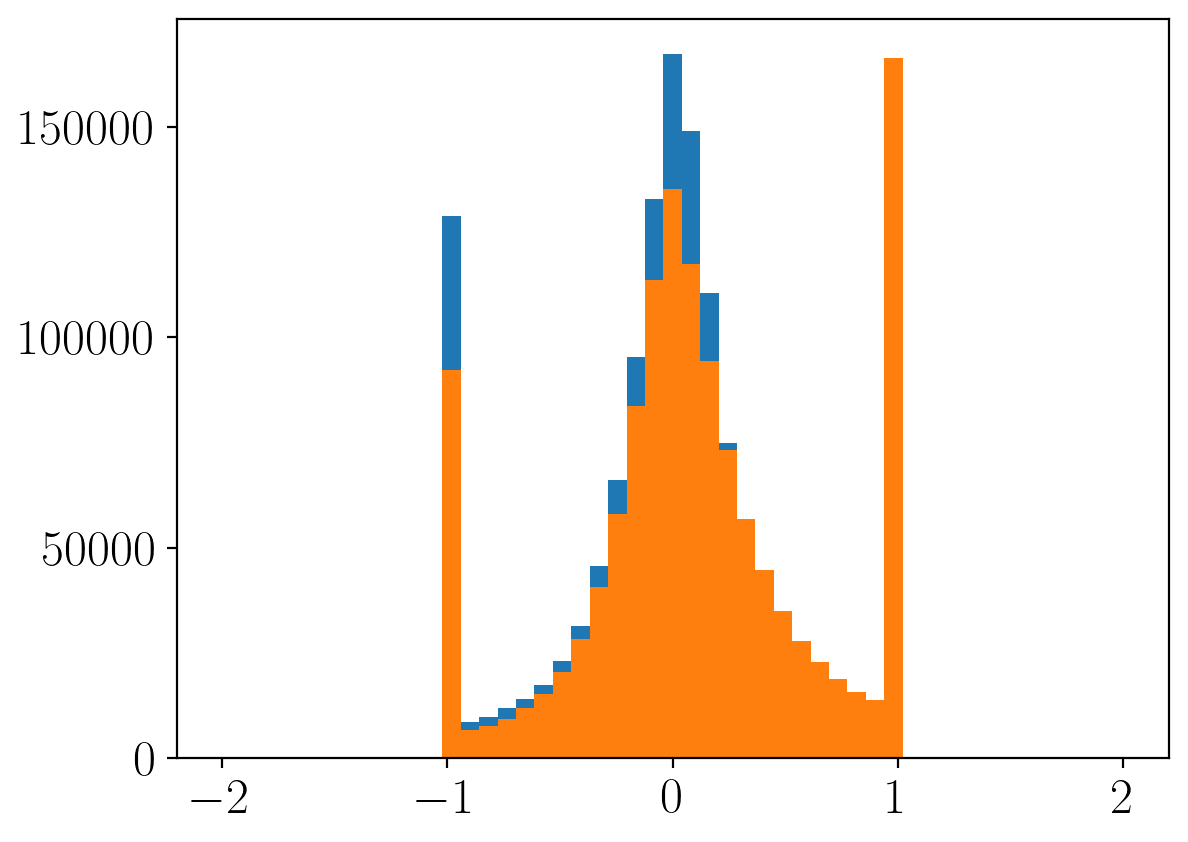

In [7]:
mask = (np.abs(df["chi1z"]+ df["chi1z_bias"]) > 1.0)
df.loc[(np.abs(df["chi1z"]+ df["chi1z_bias"]) > 1.0), "chi1z_bias"] = np.sign(df[mask]["chi1z_bias"]) - df[mask]["chi1z"]

mask = (np.abs(df["chi2z"]+ df["chi2z_bias"]) > 1.0)
df.loc[(np.abs(df["chi2z"]+ df["chi2z_bias"]) > 1.0), "chi2z_bias"] = np.sign(df[mask]["chi2z_bias"]) - df[mask]["chi2z"]

plt.hist(df["chi1z_bias"] + df["chi1z"], bins=np.linspace(-2.0, 2.0, 50));
plt.hist(df["chi2z_bias"] + df["chi2z"], bins=np.linspace(-2.0, 2.0, 50));

# Compute M_tot

In [8]:
df["m_tot"] = df["m1_src"] + df["m2_src"]
df["m_tot_bias"] = df["m1_src_bias"] + df["m2_src_bias"]
df["m_tot_err"] = np.sqrt(df["m1_src_err"]**2 + df["m2_src_err"]**2)

In [9]:
data = df[(df["hybr"]==0.0) & (df["snr"]>100)]

# plt.scatter(data["snr"], np.abs(data["m_tot_bias"])/data["m_tot_err"], s=4)
# plt.scatter(data["snr"], np.abs(data["m1_src_bias"])/data["m1_src_err"], s=4)
# plt.scatter(data["snr"], np.abs(data["m2_src_bias"])/data["m2_src_err"], s=4)

# # plt.ylim(0, 100)
# plt.show()

print(np.median(np.abs(data["m_tot_bias"])/data["m_tot_err"]))
print(np.median(np.abs(data["m1_src_bias"])/data["m1_src_err"]))
print(np.median(np.abs(data["m2_src_bias"])/data["m2_src_err"]))
print()
print(np.median(np.abs(data["m_tot_bias"])))
print(np.median(np.abs(data["m1_src_bias"])))
print(np.median(np.abs(data["m2_src_bias"])))

print()
print(np.median(np.abs(data["m_tot_err"])))
print(np.median(np.abs(data["m1_src_err"])))
print(np.median(np.abs(data["m2_src_err"])))


4.107999271216945
3.247503738439505
2.158411159319169

3.706145320171685
2.5491994902698925
1.0747268991101573

1.0220258059794767
0.8347908214051625
0.5535545259759869


# Compute $\chi_{eff}$

In [9]:
def chi_eff_from_df(df):
    chi1 = df["chi1z"]
    chi2 = df["chi2z"]
    m1 = df["m1_det"]
    m2 = df["m2_det"]

    chi_eff = (1/(m1+m2)) * (m1*chi1 + m2*chi2)

    chi1_biased = chi1 + df["chi1z_bias"]
    chi2_biased = chi2 + df["chi2z_bias"]
    m1_biased = m1 + df["m1_det_bias"]
    m2_biased = m2 + df["m2_det_bias"]

    chi_eff_biased = (1/(m1_biased+m2_biased)) * (m1_biased*chi1_biased + m2_biased*chi2_biased)
    chi_eff_bias = chi_eff_biased - chi_eff


    sigchi1 = df["chi1z_err"]
    sigchi2 = df["chi2z_err"]
    sigm1 = df["m1_det_err"]
    sigm2 = df["m2_det_err"]

    aux0=((((chi1-chi2)**2))*((m2**2)*(sigm1**2)))+((((chi1-chi2)**2))*((m1**2)*(sigm2**2)))
    aux1=((m1**2)*((((m1+m2)**2))*(sigchi1**2)))+(((m2**2)*((((m1+m2)**2))*(sigchi2**2)))+aux0)

    chi_eff_err = np.sqrt((((m1+m2)**-4.)*aux1))

    return chi_eff, chi_eff_bias, chi_eff_err


def chi_eff_src_from_df(df):
    chi1 = df["chi1z"]
    chi2 = df["chi2z"]
    m1 = df["m1_src"]
    m2 = df["m2_src"]

    chi_eff = (1/(m1+m2)) * (m1*chi1 + m2*chi2)

    chi1_biased = chi1 + df["chi1z_bias"]
    chi2_biased = chi2 + df["chi2z_bias"]
    
    m1_biased = m1 + df["m1_src_bias"]
    m2_biased = m2 + df["m2_src_bias"]

    chi_eff_biased = (1/(m1_biased+m2_biased)) * (m1_biased*chi1_biased + m2_biased*chi2_biased)
    chi_eff_bias = chi_eff_biased - chi_eff


    sigchi1 = df["chi1z_err"]
    sigchi2 = df["chi2z_err"]
    sigm1 = df["m1_src_err"]
    sigm2 = df["m2_src_err"]

    aux0=((((chi1-chi2)**2))*((m2**2)*(sigm1**2)))+((((chi1-chi2)**2))*((m1**2)*(sigm2**2)))
    aux1=((m1**2)*((((m1+m2)**2))*(sigchi1**2)))+(((m2**2)*((((m1+m2)**2))*(sigchi2**2)))+aux0)

    chi_eff_err = np.sqrt((((m1+m2)**-4.)*aux1))

    return chi_eff, chi_eff_bias, chi_eff_err

In [10]:
df["chi_eff"], df["chi_eff_bias"], df["chi_eff_err"] = chi_eff_src_from_df(df)
df = df.dropna()

# Population Distribution

In [23]:
from scipy import interpolate, integrate

def power(m1, alpha, m_min, m_max):
    '''
    BBH merger primary mass PDF.
    '''
    if alpha != -1:
        N1 = 1 / ((m_max**(alpha+1) - m_min**(alpha+1))/(alpha+1))
    else:
        N1 = 1/(np.log(m_max/m_min))

    return np.piecewise(m1, [(m1 < m_min), (m1 >= m_min)*(m1 < m_max), (m1 >= m_max)],
                        [0, lambda m1: N1*m1**alpha, 0])

def butterworth(m1, m0, eta):
    norm = integrate.trapezoid((1+ (m0/m1)**eta)**(-1), m1)

    return (1+ (m0/m1)**eta)**(-1) / norm

def truncation(m1, m_min, m_max):
    return np.piecewise(m1, [(m1 < m_max), (m1 >= m_min)*(m1 < m_max), (m1 >= m_max)],
                        [0, 1.0, 0])

def beta(chi, a, b):
    func = chi**(a-1) * (1-chi)**(b-1)
    norm = integrate.trapezoid(func, chi)
    return func/norm

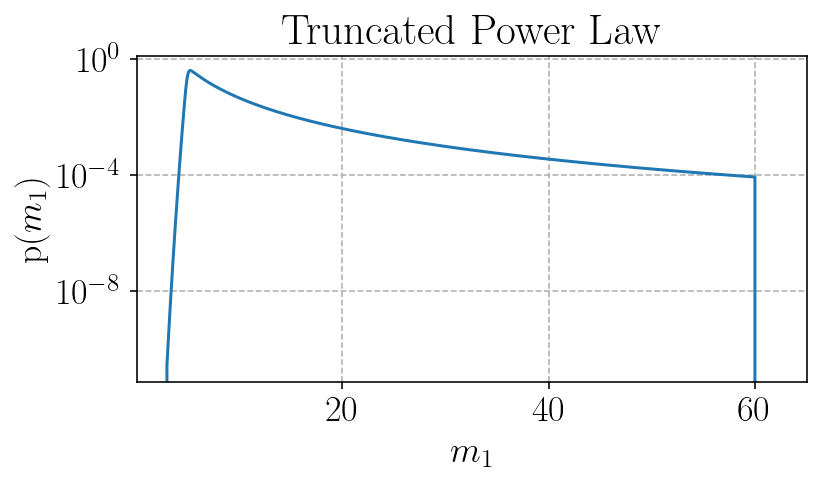

In [24]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(6,3))

bins = np.geomspace(2, 100, 100)

# plt.hist(df["m1_src"], bins=bins, histtype='step', density=True)

m1 = np.geomspace(2, 100, 100000)
pdf_m1 = butterworth(m1, 5, 50) * power(m1, -3.5, 3, 60)
pdf_m1 = pdf_m1/integrate.trapezoid(pdf_m1, m1)
plt.plot(m1, pdf_m1)

plt.xlim(0.1, 65)

plt.xlabel("$m_1$")
plt.ylabel("p($m_1$)")
# plt.legend(loc='upper right')
plt.title("Truncated Power Law", variant='small-caps')

plt.semilogy()

plt.grid(ls='--')

plt.show()

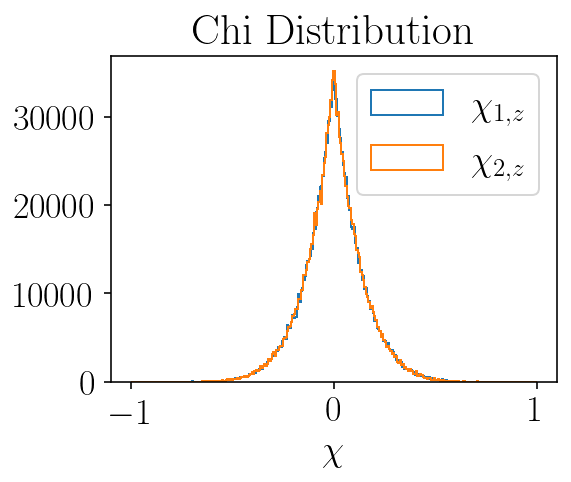

In [25]:
# Chi Distribution
fig, ax = plt.subplots(figsize=(4, 3))

chi_range = np.linspace(0, 1, 100000)
a = 2
b = 7
pdf_chi = beta(chi_range, a, b)
# plt.plot(chi_range, pdf_chi)

bins = np.linspace(-1, 1, 300)
plt.hist(df["chi1z"], bins=bins, histtype='step', label="$\chi_{1,z}$")
plt.hist(df["chi2z"], bins=bins, histtype='step', label="$\chi_{2,z}$")

# plt.xlim(0, 1)
plt.xlabel("$\chi$")
plt.ylabel("")
plt.legend(loc='upper right')
plt.title("Chi Distribution")

plt.show()

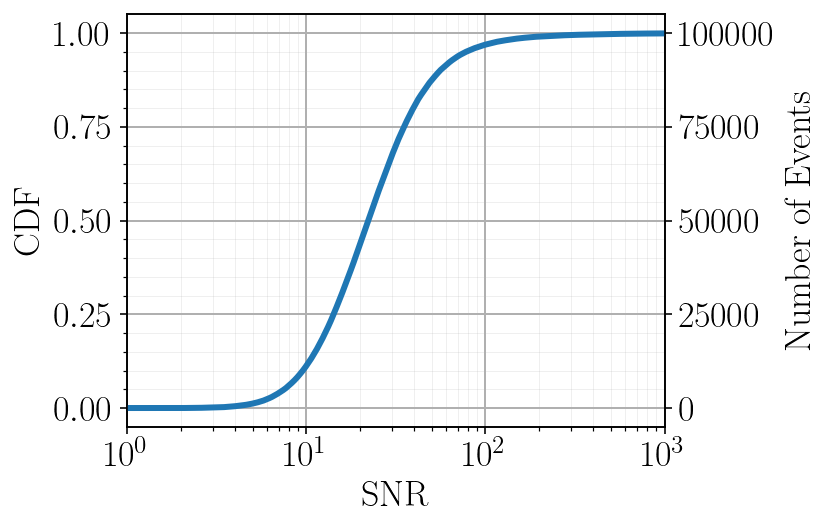

In [26]:
# SNR Distribution
fig, ax = plt.subplots(figsize=(6,4))

data = df[df["hybr"]==0]["snr"]

bins = np.geomspace(0.1, 5000, 300)
# plt.hist(data, bins=bins, histtype='step')

count, bins_count = np.histogram(data, bins=bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
ax.plot(bins_count[1:], cdf)
ax.set_ylabel("CDF")
ax.set_xlabel("SNR")

ax.grid(which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.5, alpha=0.2)
ax.minorticks_on()

ax2 = ax.twinx()
count, bins_count = np.histogram(data, bins=bins)
pdf = count
cdf = np.cumsum(pdf)
ax2.plot(bins_count[1:], cdf, lw=3)
ax2.set_ylabel("Number of Events")


plt.xlim(1, 1000)
plt.xlabel("SNR")
plt.semilogx()
plt.tick_params(axis='y', which='minor')

plt.tight_layout()
# plt.savefig("1D_bias_plots/snr_cdf.pdf", dpi=300)
plt.show()

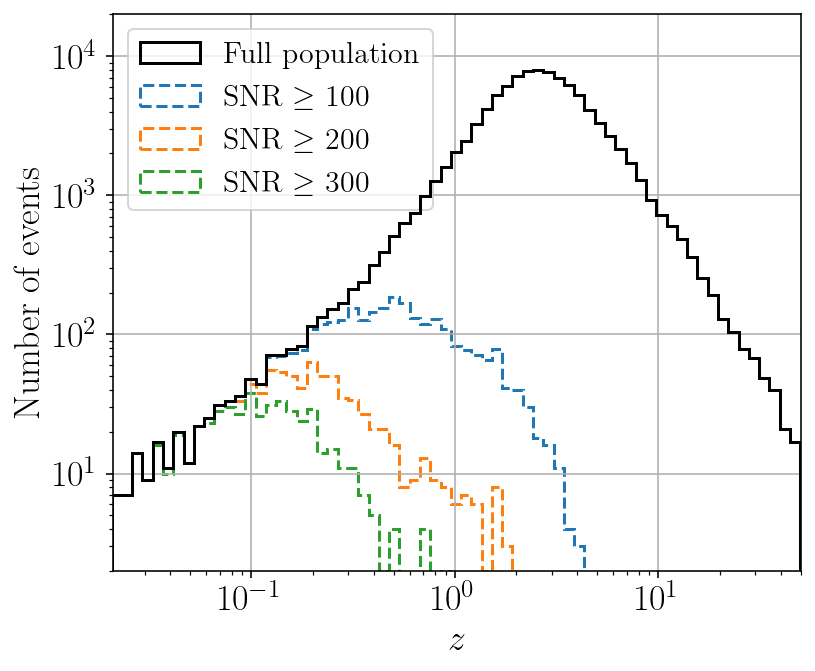

In [34]:
snrs = [100, 200, 300]

fig, ax = plt.subplots(figsize=(6,5))


data = df[(df["hybr"]==0.0) & (df["snr"]>0)]
bins = np.geomspace(0.001, 100, 100)
# bins = np.linspace(0, 10, 1000)

plt.hist(data["z"], bins=bins, label="Full population", color='k', lw=1.5, histtype='step', zorder=20)

for snr in snrs:
    data = df[(df["hybr"]==0.0) & (df["snr"]>snr)]
    bins = np.geomspace(0.001, 100, 100)
    plt.hist(data["z"], bins=bins, label=f"SNR $\geq$ {snr}", lw=1.5, ls='--', histtype='step')

plt.loglog()
plt.xlim(0.021, 50)
plt.ylim(2, 2e4)
plt.legend(fontsize=15, loc='upper left')
plt.grid()

plt.xlabel("$z$")
plt.ylabel("Number of events")

plt.tight_layout()
# plt.savefig('1D_bias_plots/snr_vs_z_dist.pdf', dpi=300)
plt.show()

## Explaining the positive DL, z biases

Usman+ 2019 (https://iopscience.iop.org/article/10.3847/1538-4357/ab0b3e) study the correlation between DL and inclination posteriors. They explain first that for most ~face-on and face-away binaries, there is a strong degeneracy between the DL and inclination measurements due to how the two dependancies show up in the GW amplitude terms.

In Fig. 8, they show the posteriors for ET with an injection of i=~60, where we can see that there is a strong support for larger DL values. Most of our binaries have i~$\pi/2$, which corresponds to this region vaguely. Hence, the Fisher analysis prefers a positive DL bias.

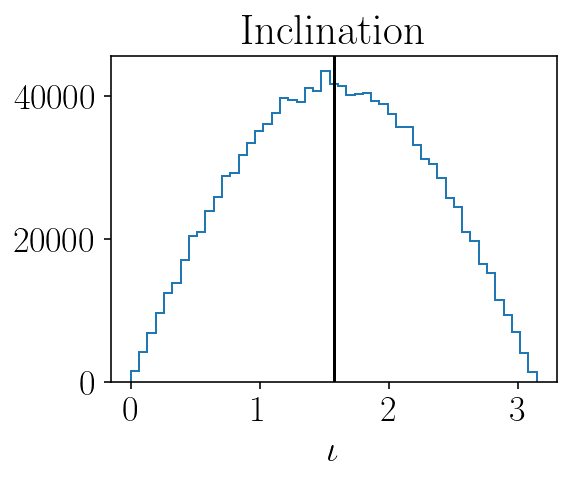

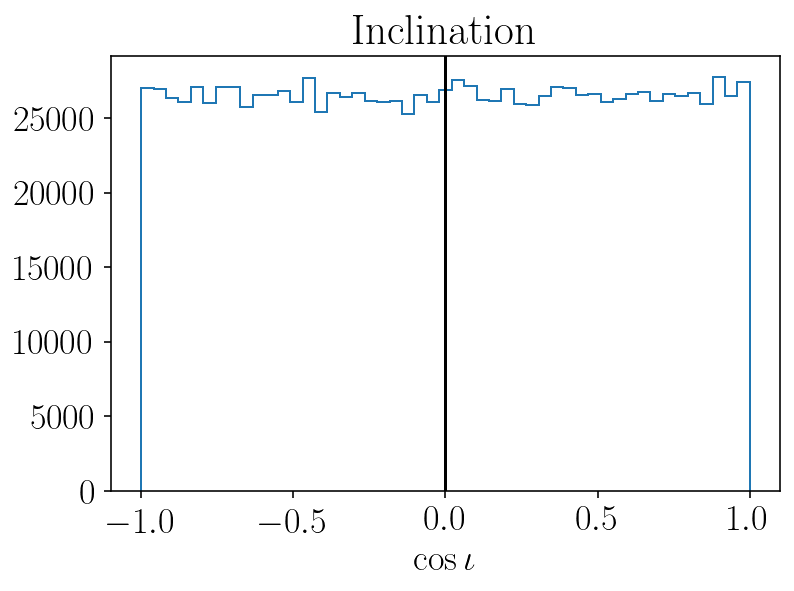

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))

bins = np.linspace(0, np.pi, 50)
plt.hist(df["iota"], bins=bins, histtype='step')
plt.axvline(np.pi/2, color='k')

# plt.xlim(0, 1)
plt.xlabel("$\iota$")
plt.ylabel("")
plt.title("Inclination")

plt.show()

bins = np.linspace(-1, 1, 50)
plt.hist(np.cos(df["iota"]), bins=bins, histtype='step')
plt.axvline(0.0, color='k')

# plt.xlim(0, 1)
plt.xlabel("$\cos \iota$")
plt.ylabel("")
plt.title("Inclination")

plt.show()

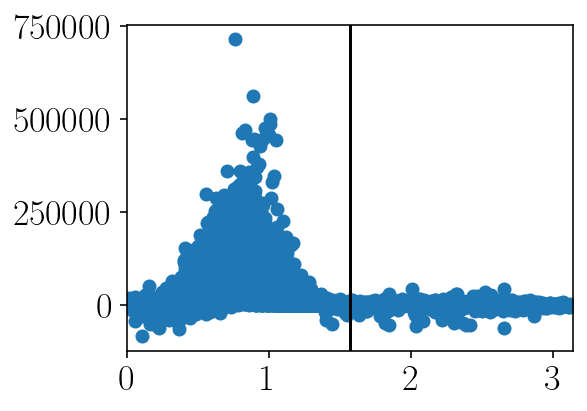

In [29]:
fig, ax = plt.subplots(figsize=(4, 3))

data = df[(df["hybr"]==0.9) & (df["snr"]>12)]
plt.scatter(data["iota"], data["DL_bias"])
plt.axvline(np.pi/2, color='k')
plt.xlim(0, np.pi)
# plt.semilogy()
plt.show()

# Comparisons to other work

## Listening to the Universe SNR comparison

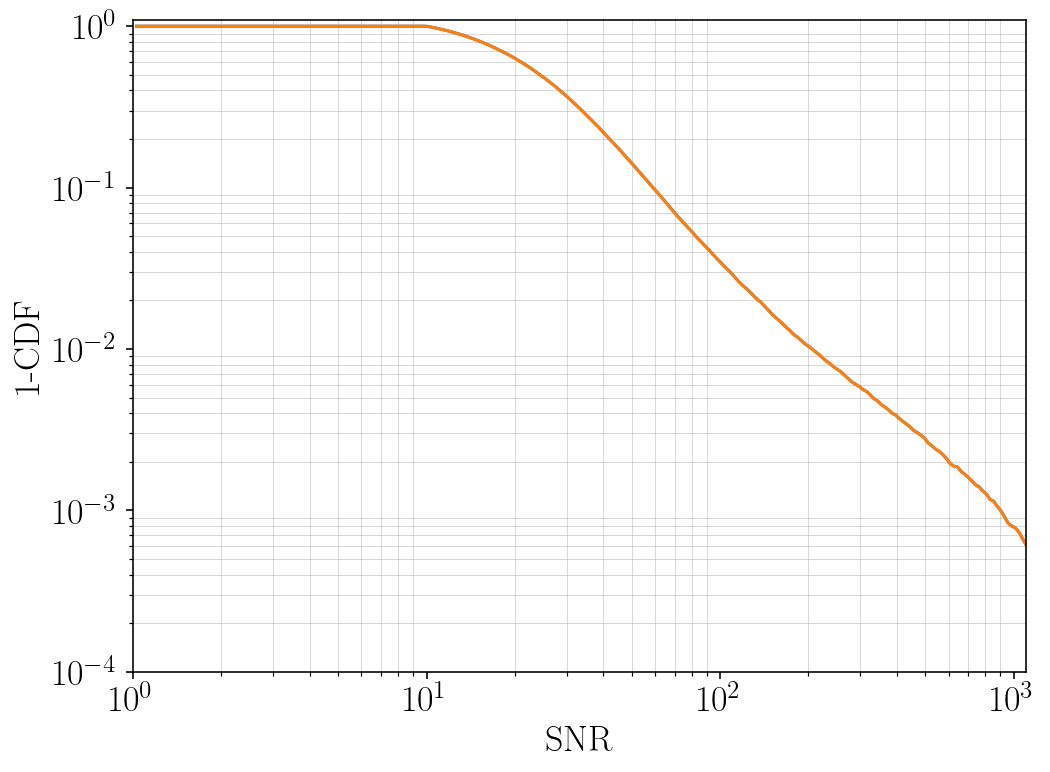

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

bins = np.geomspace(1, 5000, 300)

data = df[(df["hybr"]==0.0) & (df["snr"]>10)]["snr"]
count, bins_count = np.histogram(data, bins=bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
ax.plot(bins_count[1:], 1-cdf)

data = df[(df["hybr"]==0.0) & (df["snr"]>10) & (np.abs(df["chi1z"])<0.75) & (np.abs(df["chi2z"])<0.75)]["snr"]
count, bins_count = np.histogram(data, bins=bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
ax.plot(bins_count[1:], 1-cdf)

ax.set_ylabel("1-CDF")
ax.set_xlabel("SNR")

ax.grid(which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.5, alpha=0.5)
ax.minorticks_on()

ax.set_ylim(1e-4, 1.1)
ax.set_xlim(1, 1.1e3)
plt.loglog()
plt.grid()
plt.show()

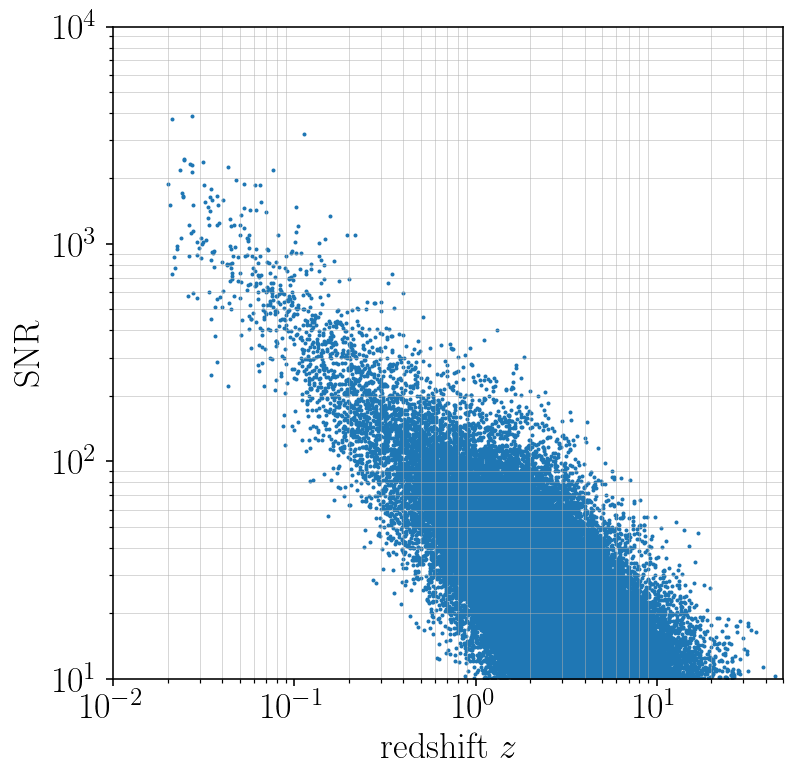

In [31]:
# compare to Fig. 5 of Listening to the Universe
# They clearly have more low redshift binaries, probably due to delay times

fig, ax = plt.subplots(figsize=(6,6))

data = df[(df["hybr"]==0.0) & (df["snr"]>10)]

plt.scatter(data["z"], data["snr"], s=1)

ax.grid(which = "minor", linewidth = 0.5, alpha=0.5)
ax.minorticks_on()

plt.xlabel("redshift $z$")
plt.ylabel("SNR")

plt.xlim(1e-2, 5e1)
plt.ylim(10, 1e4)

plt.loglog()

plt.show()

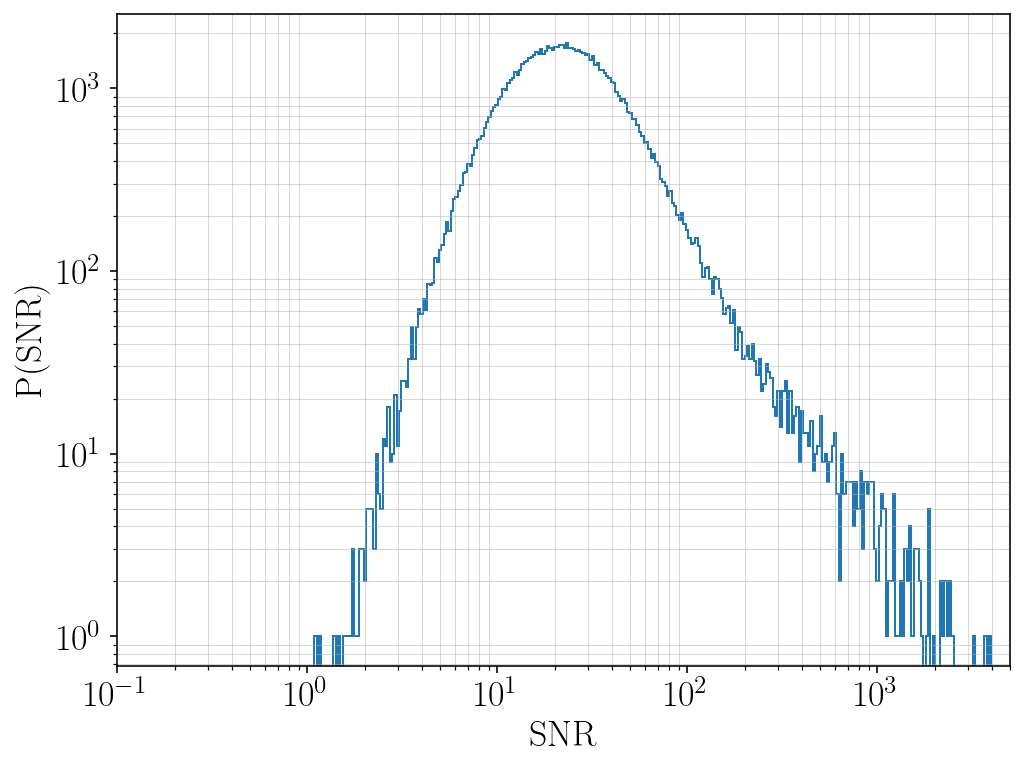

In [32]:
# compare to Fig. 7 of Iacovelli 2022 (https://iopscience.iop.org/article/10.3847/1538-4357/ac9cd4)
# compare to Fig. 6. of Pieroni 2022 (https://www.nature.com/articles/s41598-022-19540-7)

# The peak of SNR, and overall distribution, is almost identical 
# EVEN THOUGH THEY ARE USING POWER+PEAK!!!


fig, ax = plt.subplots(figsize=(8,6))

bins = np.geomspace(1, 5000, 300)

data = df[(df["hybr"]==0.0) & (df["snr"]>0)]["snr"]
# count, bins_count = np.histogram(data, bins=bins)

plt.hist(data, bins=bins, histtype='step')

ax.grid(which = "minor", linewidth = 0.5, alpha=0.5)
ax.minorticks_on()

plt.xlabel("SNR")
plt.ylabel("P(SNR)")

plt.xlim(1e-1, 5e3)
# plt.ylim(10, 1e4)

plt.loglog()

plt.show()

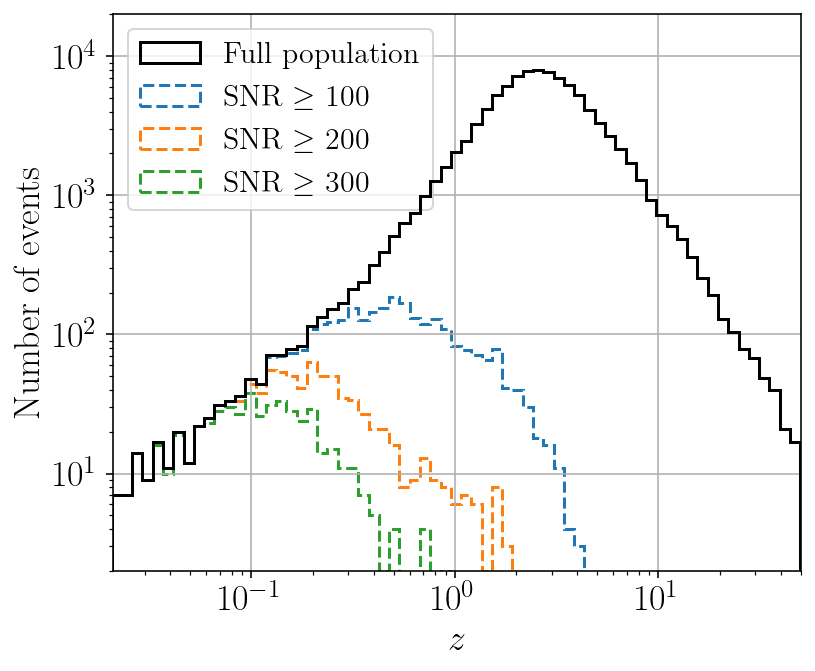

In [33]:
# Compare to Fig. 11 Iacovelli 2022 (https://iopscience.iop.org/article/10.3847/1538-4357/ac9cd4)
# The SNR distributions match almost perfectly
snrs = [100, 200, 300]

fig, ax = plt.subplots(figsize=(6,5))


data = df[(df["hybr"]==0.0) & (df["snr"]>0)]
bins = np.geomspace(0.001, 100, 100)
# bins = np.linspace(0, 10, 1000)

plt.hist(data["z"], bins=bins, label="Full population", color='k', lw=1.5, histtype='step', zorder=20)

for snr in snrs:
    data = df[(df["hybr"]==0.0) & (df["snr"]>snr)]
    bins = np.geomspace(0.001, 100, 100)
    plt.hist(data["z"], bins=bins, label=f"SNR $\geq$ {snr}", lw=1.5, ls='--', histtype='step')

plt.loglog()
plt.xlim(0.021, 50)
plt.ylim(2, 2e4)
plt.legend(fontsize=15, loc='upper left')
plt.grid()

plt.xlabel("$z$")
plt.ylabel("Number of events")

plt.tight_layout()
plt.show()

## Muttoni 2023, Dark Siren Cosmology

In [22]:
# cosmology.luminosity_distance(0.25)
# cosmology.luminosity_distance(0.1)
cosmology.luminosity_distance(1e-8)

<Quantity 4.43086699e-05 Mpc>

In [35]:
data = df[(df["hybr"]==0.0) & (df["snr"]>300) & (df["z"]<1)]
biases = np.abs(data["z_bias"])/data["z_err"]
np.median(biases)

130.54536490801624

## Ng 2021 Pop III inference

In [36]:
zs = [0.2, 1, 2, 5, 8]
params= ["m1_src", "q", "chi1z", "z"]

for i, param in enumerate(params):
    for j, z in enumerate(zs):
        data = df[(df["hybr"]==0.0) & (df["z"]>z)]
        biases = np.abs(data[param+"_bias"])/data[param+"_err"]
        biases = biases[~np.isnan(biases)]
        print(param, f", z > {z}, median bias = {np.median(biases):.1f}")

m1_src , z > 0.2, median bias = 0.6
m1_src , z > 1, median bias = 0.6
m1_src , z > 2, median bias = 0.6
m1_src , z > 5, median bias = 0.5
m1_src , z > 8, median bias = 0.4
q , z > 0.2, median bias = 2.6
q , z > 1, median bias = 2.7
q , z > 2, median bias = 3.2
q , z > 5, median bias = 5.7
q , z > 8, median bias = 8.5
chi1z , z > 0.2, median bias = 0.2
chi1z , z > 1, median bias = 0.2
chi1z , z > 2, median bias = 0.2
chi1z , z > 5, median bias = 0.1
chi1z , z > 8, median bias = 0.1
z , z > 0.2, median bias = 8.7
z , z > 1, median bias = 8.2
z , z > 2, median bias = 7.1
z , z > 5, median bias = 4.5
z , z > 8, median bias = 3.3


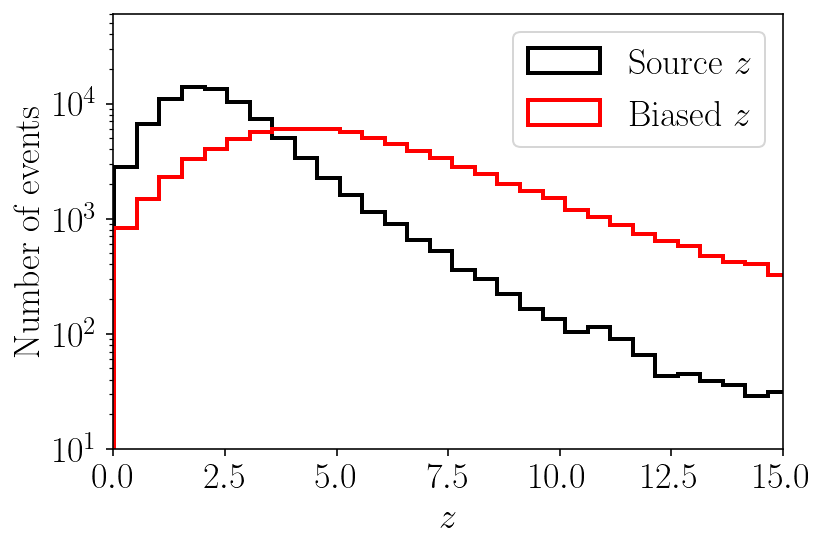

In [37]:
data = df[(df["hybr"]==0.0) & (df["snr"]>12)]

bins = np.linspace(0.02, 50, 100)
plt.hist(data["z"], bins=bins, histtype='step', lw=2, label='Source $z$', density=False, color='k')
plt.hist(data["z"] + data["z_bias"], bins=bins, lw=2, histtype='step', label="Biased $z$", density=False, color='r')
plt.xlabel('$z$')
plt.ylabel("Number of events")
plt.xlim(0.00, 15.0)
plt.ylim(10, 6e4)
plt.semilogy()
plt.legend()
plt.show()



400 Pop III injections


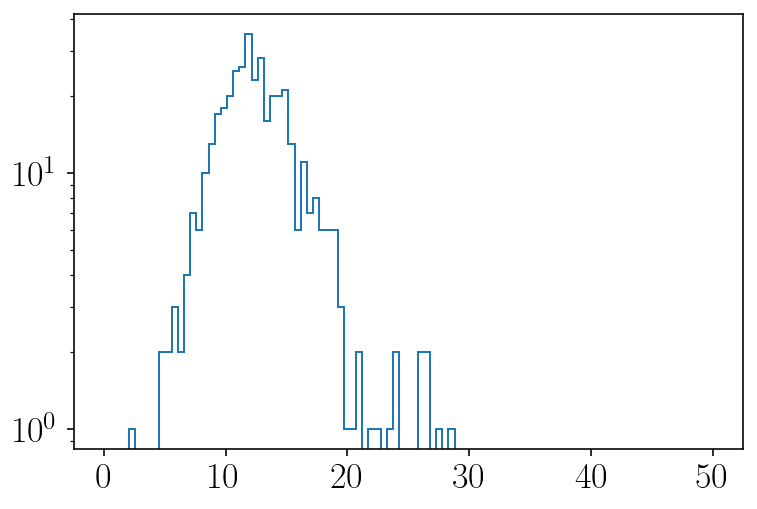

In [38]:
# create some pop III events
def pop3_z(z, a, b, c):
    return np.exp(a*(z-c)) / (b + a*np.exp((a+b)*(z-c)))

data = df[(df["hybr"]==0.0) & (df["snr"]>12)]

num_injs = int(0.5*0.024*len(data)) #0.024 is the pop III branching ratio
num_injs = 400

print(num_injs, "Pop III injections")

a = 0.66
b = 0.3
c = 11.6

z_range = np.linspace(0.02, 50.0, 10000)
pdf_z= pop3_z(z_range, a,b,c) 
pdf_z = pdf_z/integrate.trapezoid(pdf_z, z_range)

cdf_z = integrate.cumulative_trapezoid(pdf_z, z_range, initial=0)
inv_cdf_z = interpolate.interp1d(cdf_z / cdf_z[-1], z_range)
pop3_z_samples = inv_cdf_z(np.random.rand(num_injs))

bins = np.linspace(0.02, 50, 100)
plt.hist(pop3_z_samples, bins=bins, histtype='step')
plt.semilogy();

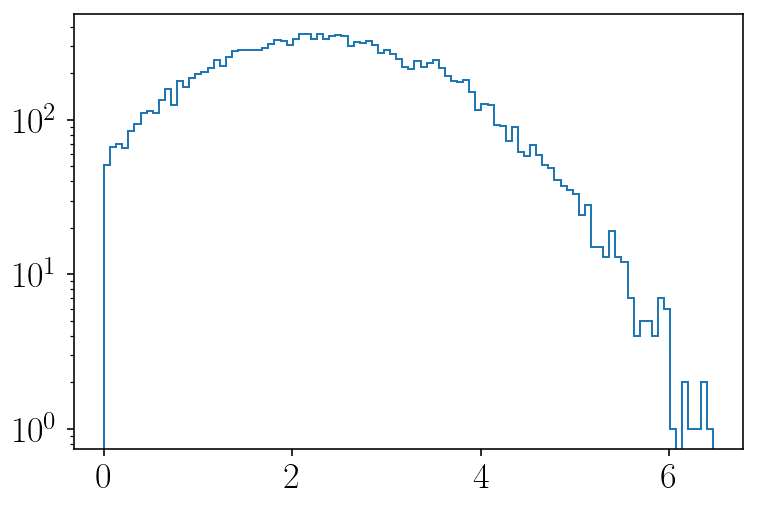

In [39]:

# create some Cluster events
# mu_z = z_at_value(Planck18.age, 1.63*u.Gyr)
# sigma_z = z_at_value(Planck18.age, 0.96*u.Gyr)
# t_z = z_at_value(Planck18.age, 0.66*u.Gyr)


data = df[(df["hybr"]==0.0) & (df["snr"]>12)]

# num_injs = int(0.5*len(data)) #half of all detections are cluster
num_injs = 16000

cluster_samples = (np.random.normal(2.3, 1.2, size=num_injs))
cluster_samples = cluster_samples[cluster_samples>0]

# cluster_samples_t = (np.random.lognormal(mean=1.63, sigma=0.96, size=1000))
# cluster_samples_t = cluster_samples_t[cluster_samples_t<13.7]

# cluster_samples = z_at_value(Planck18.lookback_time, cluster_samples_t*u.Gyr)

bins = np.linspace(0.02, 50, 100)
plt.hist(cluster_samples, bins=100, histtype='step')
plt.semilogy()
plt.show()

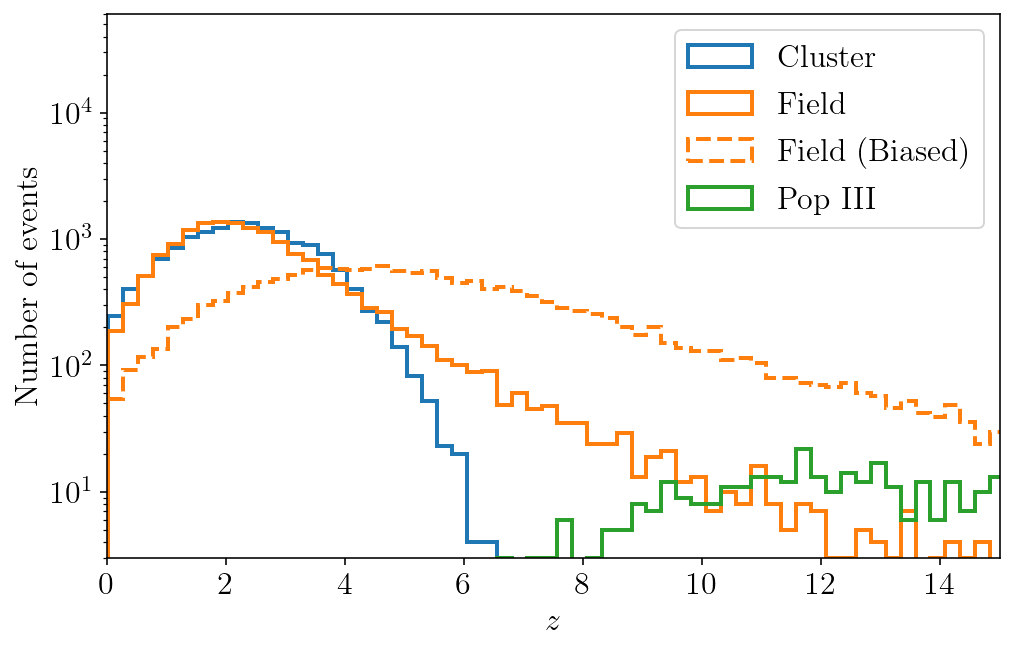

In [40]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16
})

data = df[(df["hybr"]==0.0) & (df["snr"]>12)]

num_field = 16000

fig, ax = plt.subplots(figsize=(8, 5))

bins = np.linspace(0.02, 50, 200)

plt.hist(cluster_samples, bins=bins, lw=2, histtype='step', label="Cluster", color='C0')

# plot half the field binaries, since half should be in cluster
plt.hist(data["z"][:num_field], bins=bins, histtype='step', lw=2, label='Field', density=False, color='C1')
plt.hist(data["z"][:num_field] + data["z_bias"][:num_field], bins=bins, lw=2, ls='--', histtype='step', label="Field (Biased)", density=False, color='C1')

plt.hist(pop3_z_samples, bins=bins, lw=2, histtype='step', label="Pop III", color='C2')

# total = np.concatenate((data["z"][::2].values, cluster_samples, pop3_z_samples))
# plt.hist(total, bins=bins, lw=2, histtype='step', label="Total", color='k')

# total = np.concatenate((data["z"][::2]+ data["z_bias"][::2], cluster_samples, pop3_z_samples))
# plt.hist(total, bins=bins, lw=2, histtype='step', color='k', ls='--')

plt.xlabel('$z$')
plt.ylabel("Number of events")
plt.xlim(0.00, 15.0)
plt.ylim(3, 6e4)
plt.semilogy()
plt.legend()
plt.show()



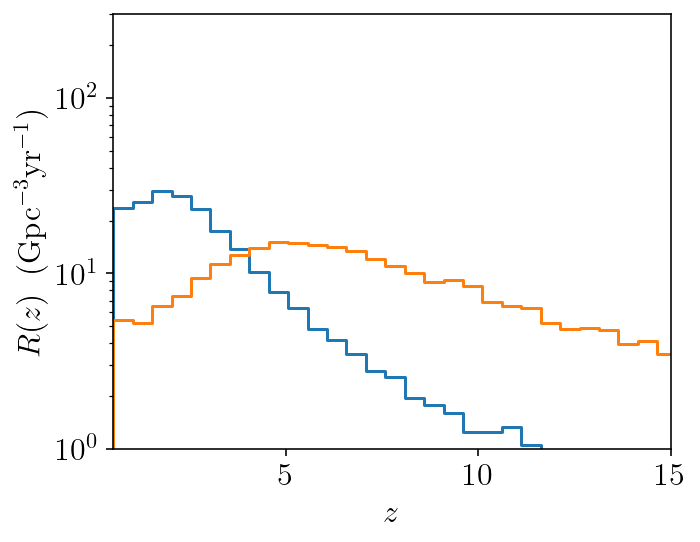

In [41]:
# Normalize by comoving volume

data = df[(df["hybr"]==0.0)]

fig, ax = plt.subplots(figsize=(5, 4))


z_range = np.linspace(0.01, 50, 100)

volumes_gpc = (cosmology.comoving_volume(z_range[1:]) - cosmology.comoving_volume(z_range[:-1])).to(u.Gpc**3).value

counts, z_bins = np.histogram(data["z"][::2], bins=z_range)
counts[0] = 0
plt.step(z_bins[1:], counts/volumes_gpc)

counts, z_bins = np.histogram(data["z"][::2]+data["z_bias"][::2], bins=z_range)
counts[0] = 0
plt.step(z_bins[1:], counts/volumes_gpc)

counts, z_bins = np.histogram(pop3_z_samples, bins=z_range)
counts[0] = 0
plt.step(z_bins[1:], counts/volumes_gpc)

plt.xlim(0.5, 15.0)
plt.ylim(1, 3e2)
plt.semilogy()

plt.xlabel('$z$')
plt.ylabel("$R(z) \;\; (\\rm Gpc^{-3} yr^{-1})$")

plt.show()


In [42]:
dl_15 = cosmology.luminosity_distance(15).value

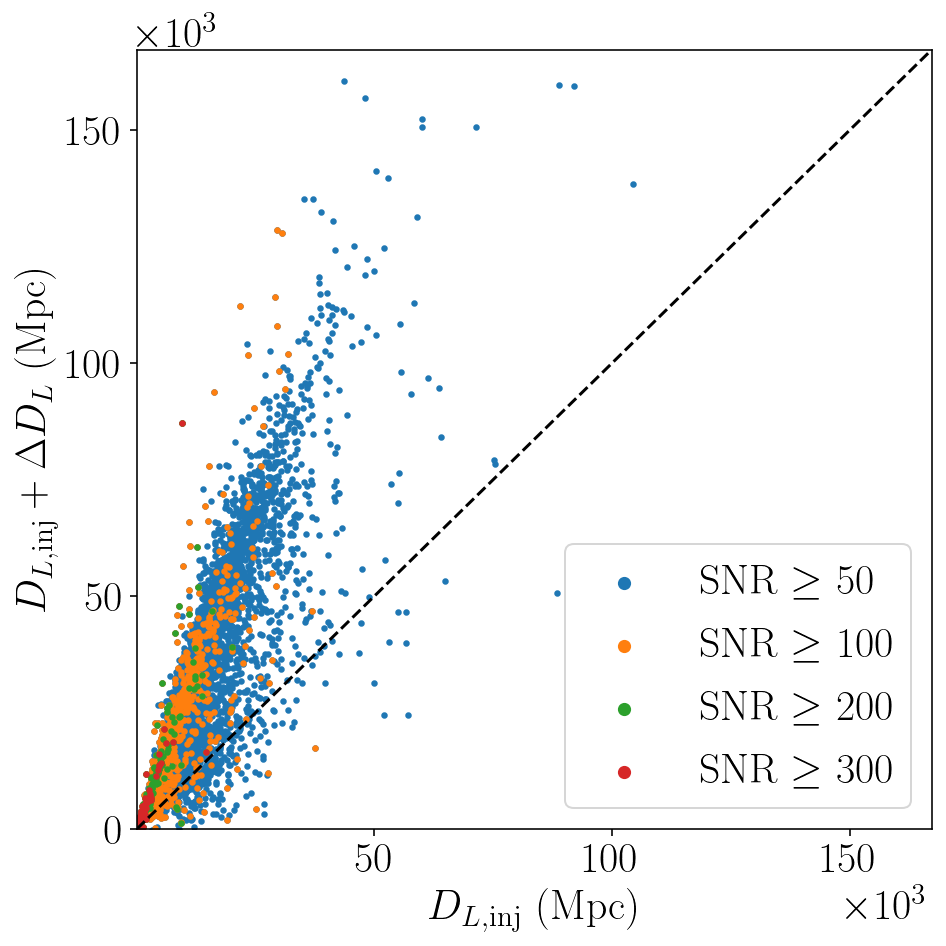

In [43]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 21
})

fig, ax = plt.subplots(figsize=(7, 7))

for snr in [50, 100, 200, 300]:
    data = df[(df["hybr"]==0.0) & (df["snr"]>snr)]
    plt.scatter(data["DL"], data["DL"]+data["DL_bias"], label=f"SNR $\geq$ {snr}", s=5)

plt.xlabel("$D_{L,\\rm inj}$ (Mpc)")
plt.ylabel("$D_{L,\\rm inj} + \Delta {D_L}$ (Mpc)")


x = np.linspace(0, dl_15, 10)
plt.plot(x, x, ls='--', color='k')
lgnd = plt.legend(markerscale=2.5)

plt.xlim(1.1e2, dl_15)
plt.ylim(1.1e2, dl_15)

plt.yticks(np.arange(0, dl_15, 50e3))

plt.ticklabel_format(axis='both', style='sci', scilimits=(3,3), useMathText=True)
plt.tight_layout()

# plt.savefig("1D_bias_plots/3g_dl_bias_hybr_0.pdf", dpi=300)
plt.show()

# Source-frame vs Detector-frame mass comparison

The overall similarity of the source frame and detector frame biases comes from the bi-directionality of the redshift bias.

When redshift is biased in the negative direction, such that the biased redshift becomes negative, the source frame mass is more biased compared to the detector frame mass. This usually correlates with $i \approx \pi/2$. 

When redshift is biased in the positive direction, the detector frame mass is more biased than the source frame mass.

These two effects compete, so that the overall result of including redshift is cancelled out.

Explanation for $- \Delta z \rightarrow$ source frame bias > detector frame bias:

When the redshift bias is $<0$, the biased $z$ tends to negative, which is unphysical. In these cases, we set the biased $z$ to 0 such that the $m_{1, \rm src}$ bias is approximately equal to the $m_{1, \rm det}$ bias.  Nevertheless, the measurement uncertainty in $m_{1, \rm src}$ becomes smaller by the addition of the $1/(1+z)$ factors to the covariance matrix (see equations). So the bias is more significant.

Explanation for $+ \Delta z \rightarrow$ source frame bias < detector frame bias:

When the redshift bias is $> 0$, there is a non-zero contribution to the $m_{1, \rm src}$ bias from $z$. This effect needs to compete with the $\mathcal{M}_c$ and $\eta$ bias, and so the total bias can be smaller OR larger than the detector mass bias in non-trivial ways. 

The measurement uncertainties are still smaller than the detector frame masses. The overall effect is mixed, with most biases being larger than the detector frame bias and a few being smaller.

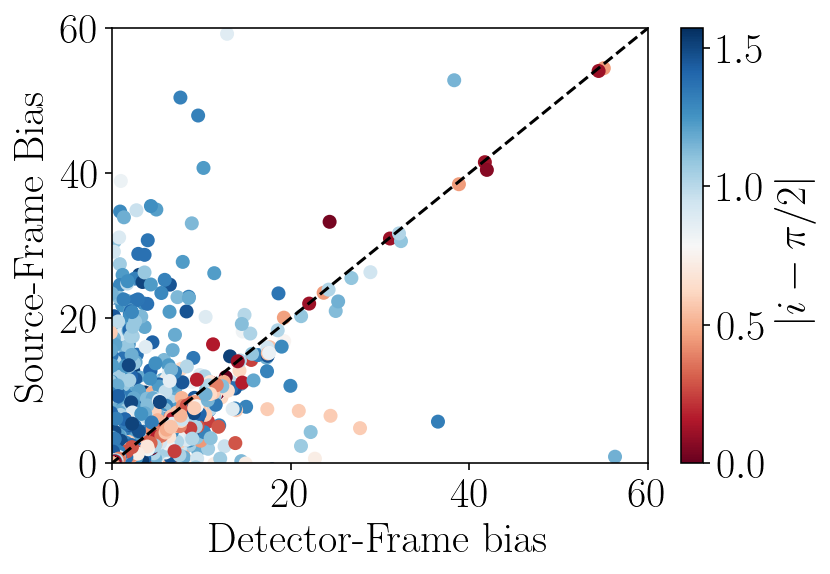

In [44]:
sc = plt.scatter((df["m1_det_bias"]/df["m1_det_err"]), (df["m1_src_bias"]/df["m1_src_err"]), c=np.abs(df["iota"]-np.pi/2), cmap="RdBu", vmin=0, vmax=np.pi/2)
cbar = plt.colorbar(sc)
cbar.set_label("$|i-\pi/2|$")

# sc = plt.scatter((df["m1_det_bias"]/df["m1_det_err"]), (df["m1_src_bias"]/df["m1_src_err"]), c=np.abs(df["DL_bias"]/df["DL"]), cmap="RdBu", vmin=-2, vmax=2)
# cbar = plt.colorbar(sc)
# cbar.set_label("$\Delta DL / DL$")

# sc = plt.scatter(df["iota"],(df["DL_bias"]/df["DL_err"]) , c=np.abs(df["iota"]-np.pi/2), cmap="RdBu", vmin=0, vmax=np.pi/2)


plt.xlabel("Detector-Frame bias")
plt.ylabel("Source-Frame Bias")
x = np.linspace(-60, 60, 10)
plt.plot(x,x, color='k', ls='--')
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.show()

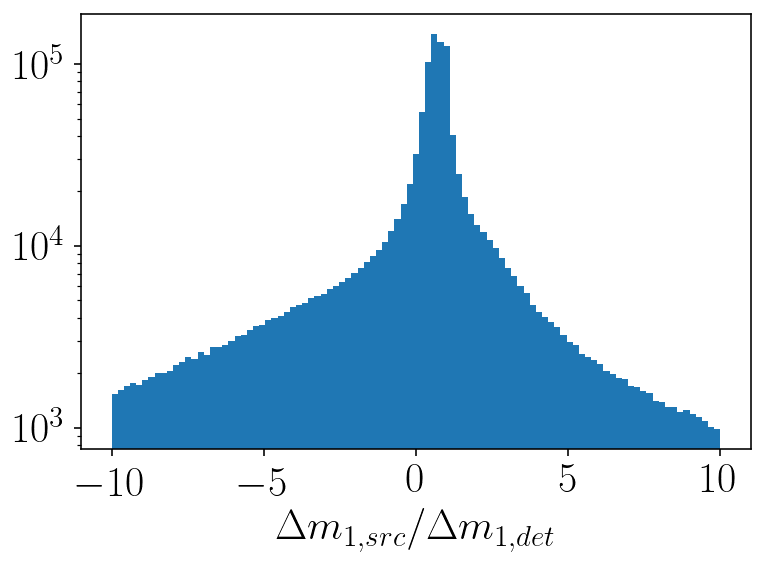

In [45]:
m1_src_bias = df["m1_src_bias"]/df["m1_src_err"]
m1_det_bias = df["m1_det_bias"]/df["m1_det_err"]
plt.hist(m1_src_bias/m1_det_bias, bins=np.linspace(-10, 10, 100))
plt.xlabel('$\Delta m_{1, src} / \Delta m_{1, det}$')
plt.semilogy()
plt.show()

# Hybr Features

In [10]:
labels = {
    'Mc': '$\mathcal{M}_c$',
    'eta': '$\eta$',
    'chi1z': '$\chi_{1,\\rm z} \;\;\,$',
    'chi2z': '$\chi_{2, \\rm z}$',
    'DL': '$D_{\\rm L}$',
    'z': '$z \;\;\;\;\;\;$',
    'm1_det': '$m_{1, \\rm det}$',
    'm2_det': '$m_{2, \\rm det}$',
    'm1_src': '$m_{1, \\rm src}$',
    'm2_src': '$m_{2, \\rm src}$',
    'chi_eff': '$\chi_{\\rm eff}$',
    'ra': 'ra',
    'dec': 'dec',
    'psi': 'psi',
    'iota': 'iota',
    'q': '$q \;\;\;\;\;\;\,$',
    'm_tot': '$M_{\\rm total}$'
}

## Hybr = 0.0 Median Biases

In [11]:
data = df[(df["hybr"]==0.0) & (df["snr"]>100)]
print(f"Average Mismatch = {1-np.average(data['faith']):.2e}")

Average Mismatch = 4.42e-03


In [14]:
snrs = [100, 200, 300]
# params= ["m1_src", "m2_src", "m_tot", "q", "chi1z", "chi2z", "z", "DL"]
params= ["m1_det", "m2_det", "m1_src", "m2_src", "q", "chi1z", "chi2z", "DL", "z"]

for i, param in enumerate(params):
    print()
    for j, snr in enumerate(snrs):
        data = df[(df["hybr"]==0.0) & (df["snr"]>snr)]
        biases = np.abs(data[param+"_bias"])/data[param+"_err"]
        biases = biases[~np.isnan(biases)]
        errs = data[param+"_err"]

        # abs_biases = np.abs(data[param+"_bias"])
        abs_biases = (data[param+"_bias"])
        abs_biases = abs_biases[~np.isnan(abs_biases)]

        rel_biases = np.abs(data[param+"_bias"])/data[param]
        rel_biases = rel_biases[~np.isnan(rel_biases)]
        print(param, f", snr > {snr}, median bias = {np.median(biases):.1f} $\sigma$, {np.median(abs_biases):.2f} units, err: {np.median(errs):.2f}, median injected val: {np.median(data[param]):.2f}")




m1_det , snr > 100, median bias = 1.8 $\sigma$, -0.68 units, err: 0.82, median injected val: 11.90
m1_det , snr > 200, median bias = 3.2 $\sigma$, -0.58 units, err: 0.31, median injected val: 8.89
m1_det , snr > 300, median bias = 4.0 $\sigma$, -0.52 units, err: 0.21, median injected val: 8.31

m2_det , snr > 100, median bias = 1.9 $\sigma$, 0.62 units, err: 0.55, median injected val: 8.33
m2_det , snr > 200, median bias = 3.0 $\sigma$, 0.48 units, err: 0.24, median injected val: 6.44
m2_det , snr > 300, median bias = 4.1 $\sigma$, 0.41 units, err: 0.17, median injected val: 6.15

m1_src , snr > 100, median bias = 3.2 $\sigma$, -2.40 units, err: 0.83, median injected val: 8.57
m1_src , snr > 200, median bias = 5.0 $\sigma$, -1.71 units, err: 0.31, median injected val: 7.66
m1_src , snr > 300, median bias = 6.3 $\sigma$, -1.30 units, err: 0.22, median injected val: 7.55

m2_src , snr > 100, median bias = 2.2 $\sigma$, -0.98 units, err: 0.55, median injected val: 6.03
m2_src , snr > 200

## SNR

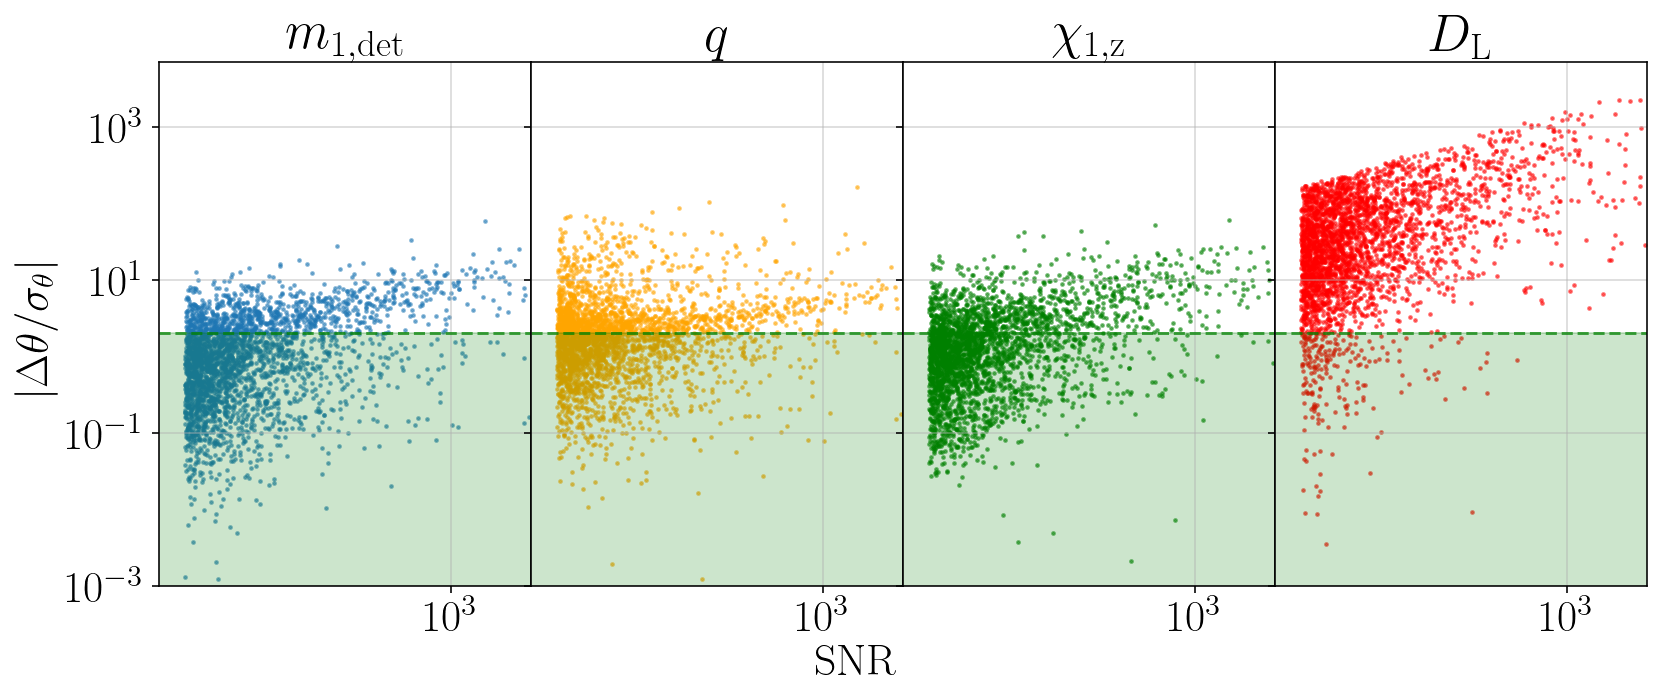

In [401]:
snr_lim = 100
params= ["m1_det", "q", "chi1z", "DL"]
cs = ["C0", "orange", "g", "red"]

fig, axes = plt.subplots(nrows=1, ncols=len(params), sharey=True, sharex=True, figsize=(12, 5))


data = df[(df["hybr"]==0.0) & (df["snr"]>snr_lim)]
for i, param in enumerate(params):
    axes[i].scatter(data["snr"], np.abs(data[param+"_bias"])/data[param+"_err"], s=2, color=cs[i], alpha=0.5)
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_ylim(1e-3, 7e3)
    axes[i].set_xlim(0.8e2, 2e3)
    
    axes[i].set_title(labels[param])

    axes[i].grid(alpha=0.5)
    # axes[i].xaxis.grid(True, which='minor')
    
    x = np.linspace(0, 1e5, 3)
    axes[i].axhline(y=2.0, c='g', ls='--', alpha=0.7)
    axes[i].fill_between(x, y1=0, y2=2.0, color='g', alpha=0.2)


axes[0].set_ylabel("$|{\Delta \\theta/\sigma_{\\theta}}|$")


plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.text(s="SNR", x=1.5, y=7e-5)


# plt.savefig('1D_bias_plots/hybr_0_bias_vs_snr.pdf', dpi=300)
plt.show()

### SNR at which median bias = 2\sigma

m1_det SNR for 2\sigma bias: 168
m2_det SNR for 2\sigma bias: 119
m1_src SNR for 2\sigma bias: 122
m2_src SNR for 2\sigma bias: 88
q SNR for 2\sigma bias: 121
chi1z SNR for 2\sigma bias: 140
chi2z SNR for 2\sigma bias: 195


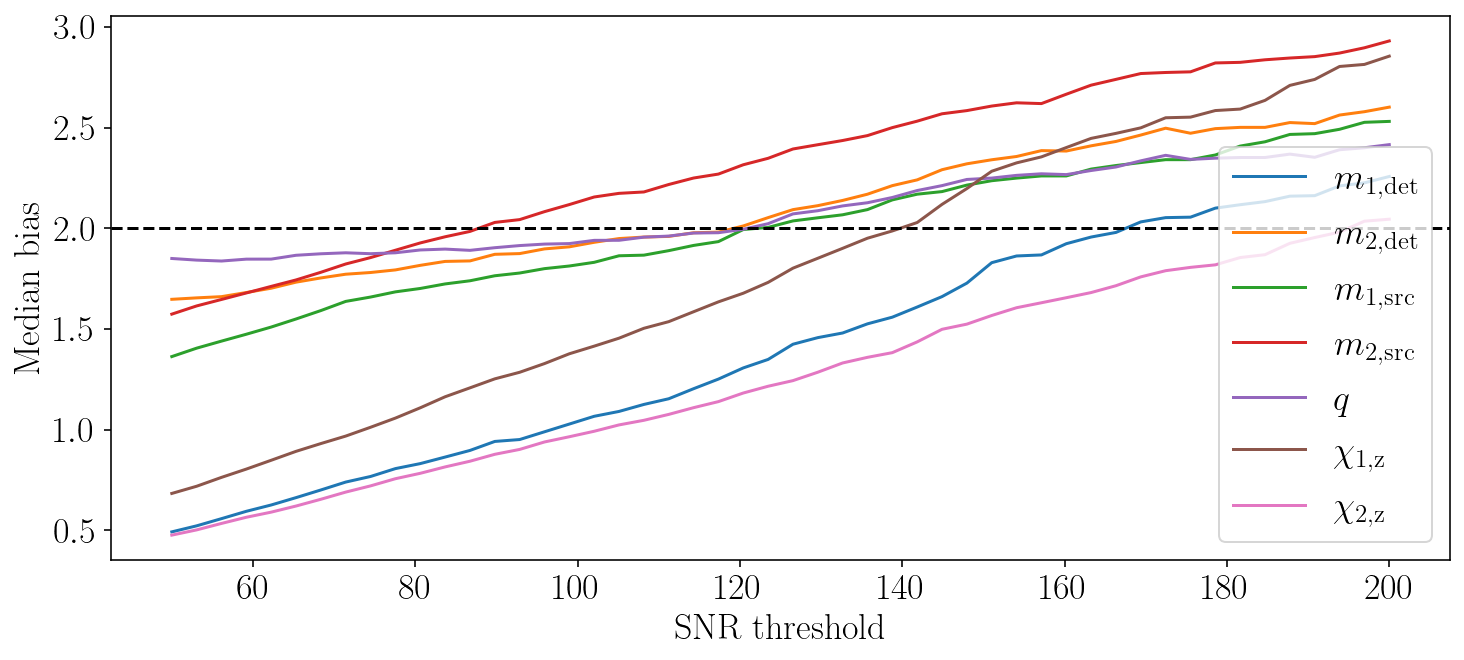

In [450]:
from scipy import interpolate

params= ["m1_det", "m2_det", "m1_src", "m2_src", "q", "chi1z", "chi2z"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

snr_lims = np.linspace(50, 200, 50)
med_biases = np.zeros(len(snr_lims))
for i, param in enumerate(params):
    for j, snr_lim in enumerate(snr_lims):
        data = df[(df["hybr"]==0.0) & (df["snr"]>snr_lim)]

        biases = np.abs(data[param+"_bias"])/data[param+"_err"]
        biases = biases[~np.isnan(biases)]
        med_biases[j] = np.median(biases)

    plt.plot(snr_lims, med_biases, label=labels[param])
    
    bias_interp = interpolate.interp1d(med_biases, snr_lims, fill_value='extrapolate')
    # plt.axvline(x= bias_interp(2), color='k', ls='--')
    print(param, "SNR for 2\sigma bias:", f"{bias_interp(2):.0f}")
plt.xlabel('SNR threshold')
plt.ylabel('Median bias')
plt.axhline(y=2, color='k', ls='--')
plt.legend()
# plt.semilogy()
plt.show()


m1_det SNR for 2\sigma bias: 370
m2_det SNR for 2\sigma bias: 260
m1_src SNR for 2\sigma bias: 311
m2_src SNR for 2\sigma bias: 139
q SNR for 2\sigma bias: 81
chi1z SNR for 2\sigma bias: 315
chi2z SNR for 2\sigma bias: 363


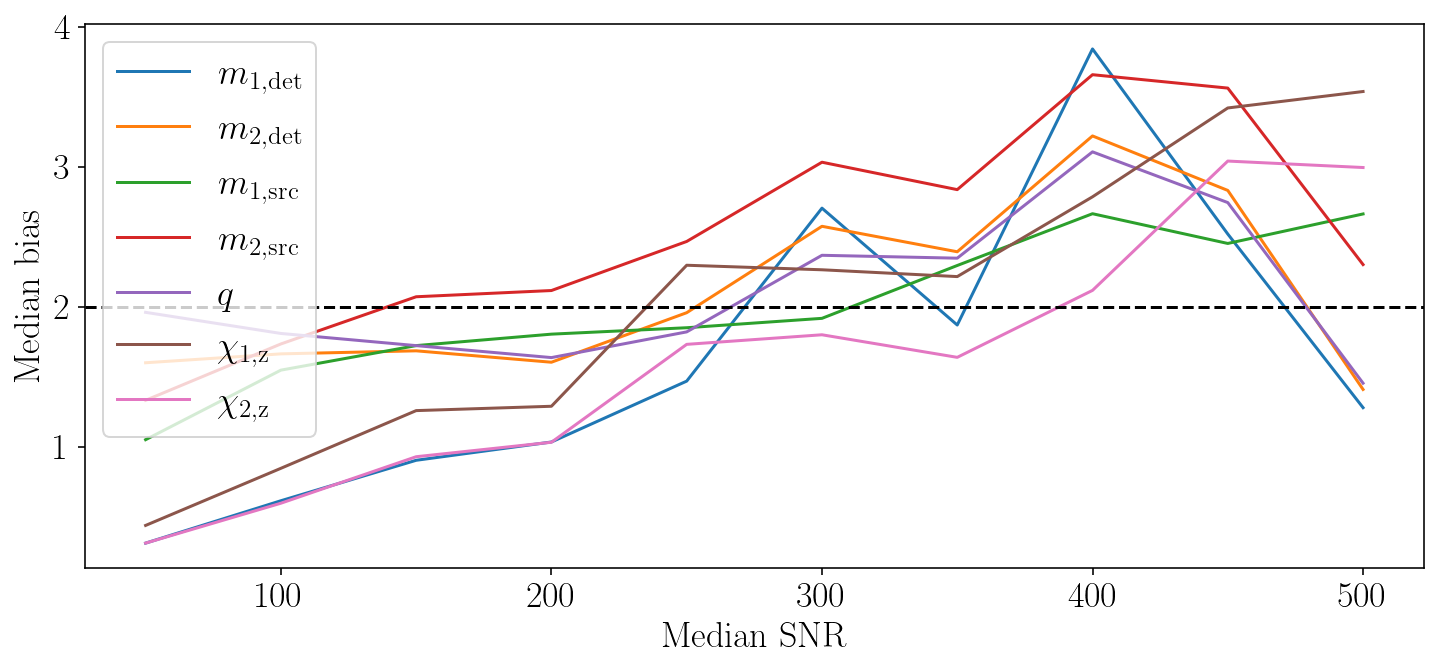

In [453]:
from scipy import interpolate

params= ["m1_det", "m2_det", "m1_src", "m2_src", "q", "chi1z", "chi2z"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

snr_lims = np.linspace(50, 500, 10)
med_biases = np.zeros(len(snr_lims))
for i, param in enumerate(params):
    for j, snr_lim in enumerate(snr_lims):
        data = df[(df["hybr"]==0.0) & (df["snr"]>snr_lim-10) & (df["snr"]<snr_lim+10)]

        biases = np.abs(data[param+"_bias"])/data[param+"_err"]
        biases = biases[~np.isnan(biases)]
        med_biases[j] = np.median(biases)

    plt.plot(snr_lims, med_biases, label=labels[param])
    
    bias_interp = interpolate.interp1d(med_biases, snr_lims, fill_value='extrapolate')
    # plt.axvline(x= bias_interp(2), color='k', ls='--')
    print(param, "SNR for 2\sigma bias:", f"{bias_interp(2):.0f}")
plt.xlabel('Median SNR')
plt.ylabel('Median bias')
plt.axhline(y=2, color='k', ls='--')
plt.legend()
# plt.semilogy()
plt.show()


### Theoretical Faithfulness requirement
from https://journals.aps.org/prd/abstract/10.1103/PhysRevD.95.104004

Faithfulness requirement:
$1-F \lt \frac{D}{2 SNR^2}$

$SNR \lt \sqrt{\frac{D}{2(1-F)}}$

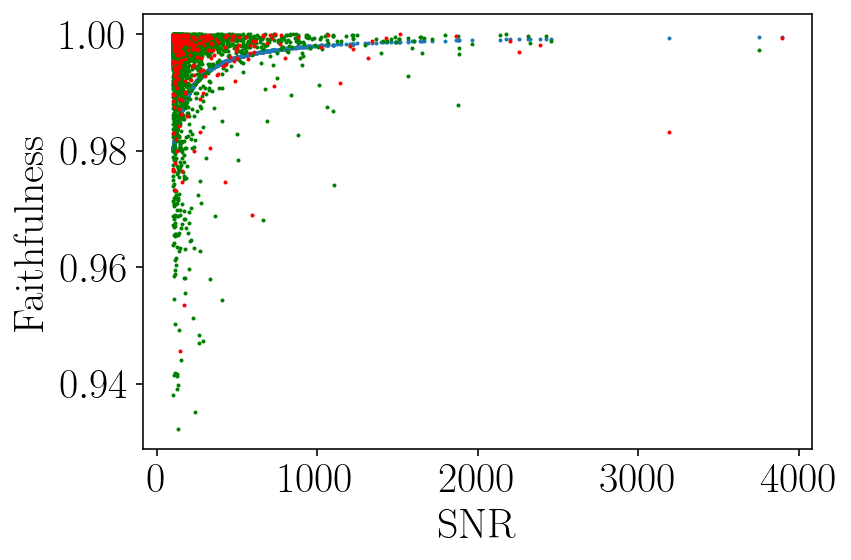

In [53]:
snr_lim = 100
data = df[(df["hybr"]==0.0) & (df["snr"]>snr_lim)]

snr_faith_lim = 1- np.sqrt(8/(2*data["snr"]**2))

vars=["m2_src"]
bias_mask = np.ones(len(data), dtype=bool)

for var in vars:
    bias_mask = bias_mask * (data[var+"_bias"]/ data[var+"_err"] > 1)


biased_data = data[bias_mask]
unbiased_data = data[~bias_mask]

# # unbiased_data = data[data[var+"_bias"]/ data[var+"_err"] < 1]

plt.scatter(data["snr"], snr_faith_lim, s=1, label="threshold")

plt.scatter(unbiased_data["snr"], unbiased_data["faith"], s=1, c='g')
plt.scatter(biased_data["snr"], biased_data["faith"], s=1, c='r')
plt.xlabel("SNR")
plt.ylabel("Faithfulness")
plt.show()



### figure out which events have large SNR but low bias

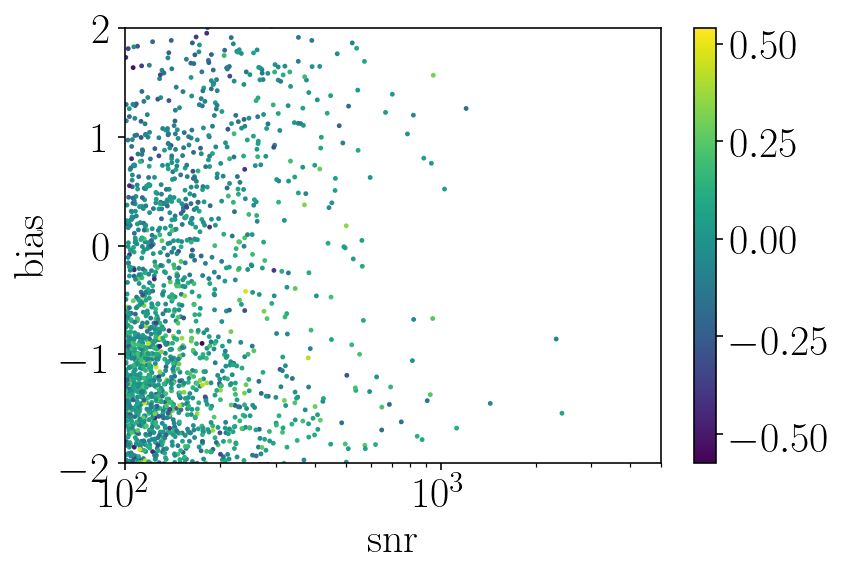

In [54]:
data = df[(df["hybr"]==0.0) & (df["snr"]>100)]
param="m1_src"


sc = plt.scatter(data["snr"], (data[param+"_bias"])/data[param+"_err"], s=2, c=data["chi2z"])
plt.colorbar(sc)

plt.xlim(100, 5000)
plt.ylim(-2, 2)

plt.semilogx()
plt.xlabel("snr")
plt.ylabel("bias")
plt.show()

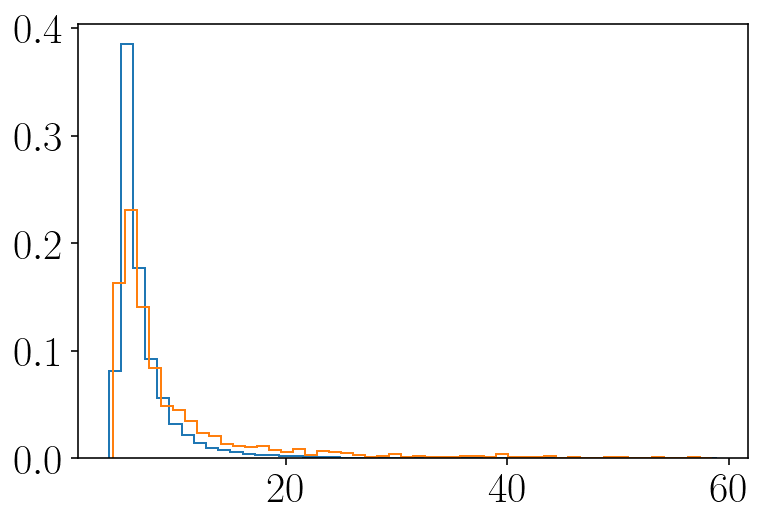

m1_src


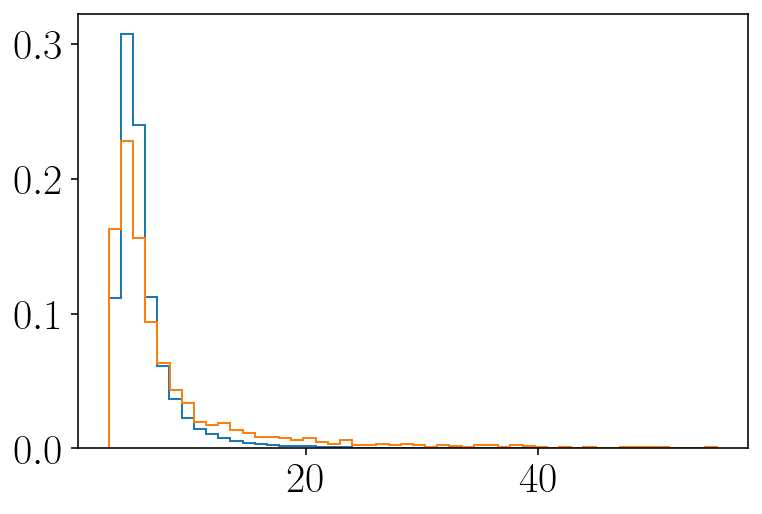

m2_src


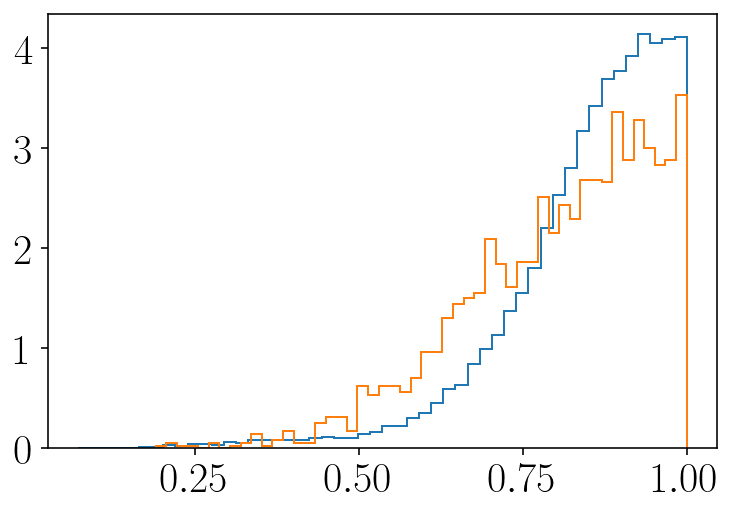

q


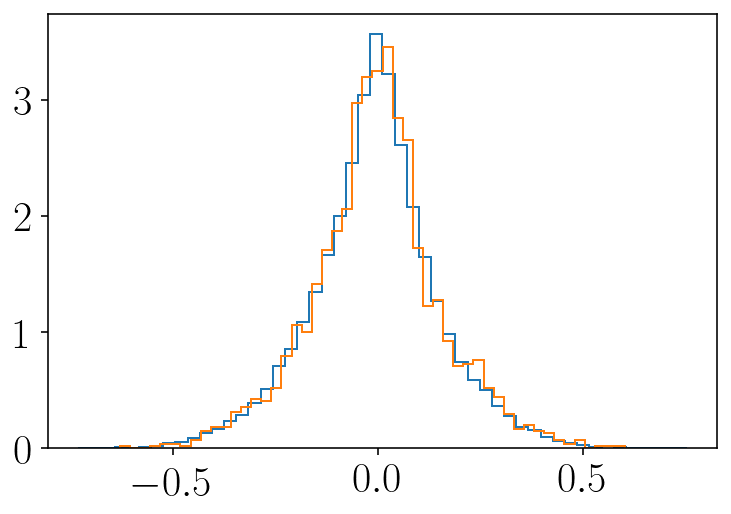

chi1z


In [88]:
bias_param = "q"
data_all = df[(df["hybr"]==0.0) & (df["snr"]>10) & ((df[bias_param+"_bias"] / df[bias_param+"_err"])<2)]
data_2 = df[(df["hybr"]==0.0) & (df["snr"]>100)& ((df[bias_param+"_bias"] / df[bias_param+"_err"])<2)]

params = ["m1_src", "m2_src", "q", "chi1z"]
for param in params:
    plt.hist(data_all[param], bins=50, histtype='step', density=True)
    plt.hist(data_2[param], bins=50, histtype='step', density=True)
    plt.show()
    print(param)

Seems like equal mass ratio binaries are the ones that survive high snrs.

## Avg Faithfulness

In [55]:
def plot_avg_vs_hybr(ax, df, quantity, x_qty="hybr", label="", **kwargs):
    hybrs = np.unique(df["hybr"])
    avg_qty = np.zeros_like(hybrs)
    x_data = np.zeros_like(hybrs)
    
    for i, hybr in enumerate(hybrs):
        mask = (df["hybr"]==hybr)
        avg_qty[i] = np.average(quantity[mask])
        x_data[i] = np.average(df[mask][x_qty])

    cs = CubicSpline(x_data, avg_qty)
    ax.scatter(x_data, avg_qty)
    x = np.linspace(0,1,50)
    ax.plot(x, cs(x), label=label)
    # ax.plot(x_data, avg_qty, label=label, **kwargs)


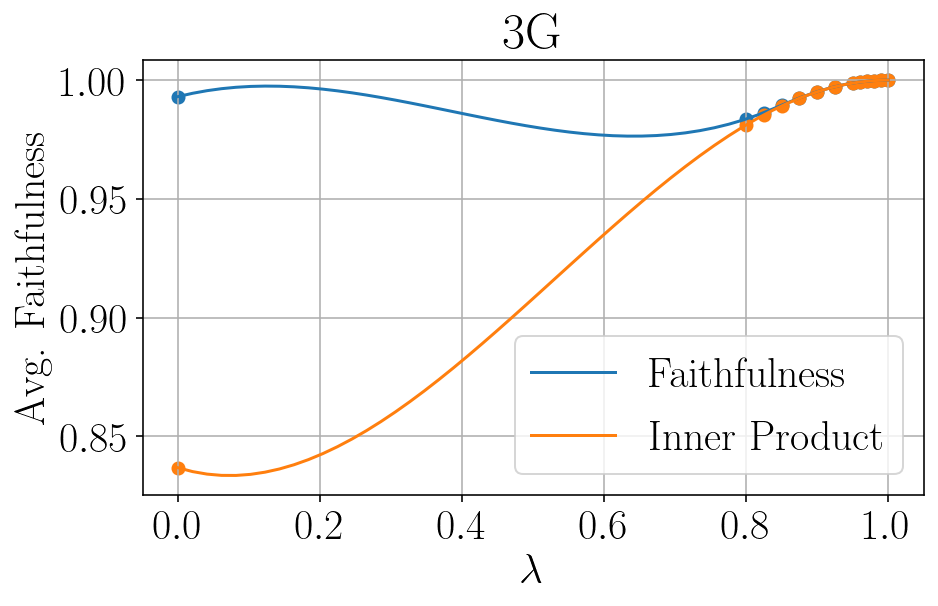

In [56]:
fig, ax = plt.subplots(figsize=(7, 4))


plot_avg_vs_hybr(ax, df, df["faith"], label="Faithfulness", lw=3)
plot_avg_vs_hybr(ax, df, df["inner_prod"], label="Inner Product", lw=3)


ax.set_xlabel("$\lambda$")
ax.set_ylabel("Avg. Faithfulness")
# plt.ylim(0.95, 1.0)
plt.grid()
# plt.loglog()
plt.title('3G')
plt.legend()
plt.show()

## Average bias vs Faithfulness

In [57]:
def bias_avg_var_plot(df, ax, hybrs=np.linspace(0.0, 1.0, 1), x_qty="hybr", xlabel='$\lambda$', title='', vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'],
                    legend_loc='upper right', snr_lim = None, labels=None, **kwargs):

    if snr_lim is not None:
        df = df[df["snr"]>snr_lim]
    
    for var in vars:
        x_data = np.zeros_like(hybrs)
        avg_qty = np.zeros_like(hybrs)
        x_data = np.zeros_like(hybrs)
        
        for i, hybr in enumerate(hybrs):
            mask = (df["hybr"]==hybr)
            df_hybr = df[mask]
            quantity = np.abs(df_hybr[f"{var}_bias"]/df_hybr[f"{var}_err"])
            avg_qty[i] = np.average(quantity)
            x_data[i] = np.average(df_hybr[x_qty])

        if labels is None:
            ax.plot(x_data, avg_qty, **kwargs)
        else:
            ax.plot(x_data, avg_qty, label=labels[var], **kwargs)
        

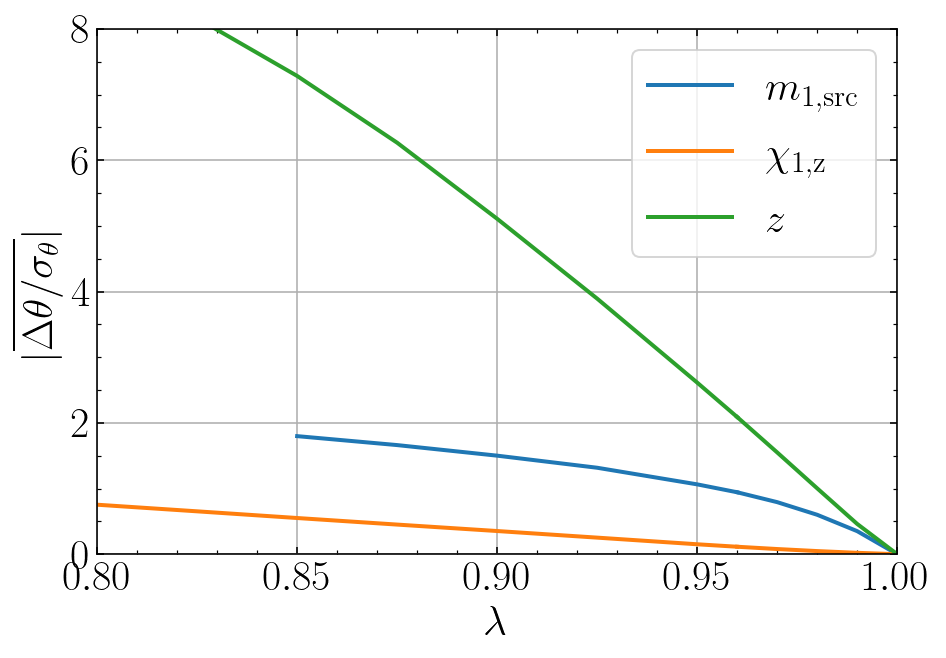

In [58]:
hybrs = np.unique(df["hybr"])

# vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi_eff', 'DL']
vars = ['m1_src', 'chi1z', 'z']

# vars = ["Mc"]




snr_lim=50

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 5))


#
bias_avg_var_plot(df, ax, hybrs[:9], vars=vars, title='3G', labels=None, snr_lim=snr_lim,
                lw=2, linestyle='-')
ax.set_prop_cycle(None)
bias_avg_var_plot(df, ax, hybrs[8:], vars=vars, title='3G', labels=labels, snr_lim=snr_lim,
                lw=2)

ax.set_xlim(0.8, 1.0)
ax.set_ylim(0, 8)


ax.set_xlabel("$\lambda$")
ax.set_ylabel("$|\overline{\Delta \\theta/\sigma_{\\theta}}|$")

plt.legend(loc='upper right')

plt.grid(which='major')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)

plt.tight_layout()
# plt.savefig('1D_bias_plots/3g_pop_bias_sig_vs_lambda.pdf', dpi=300)

plt.show()

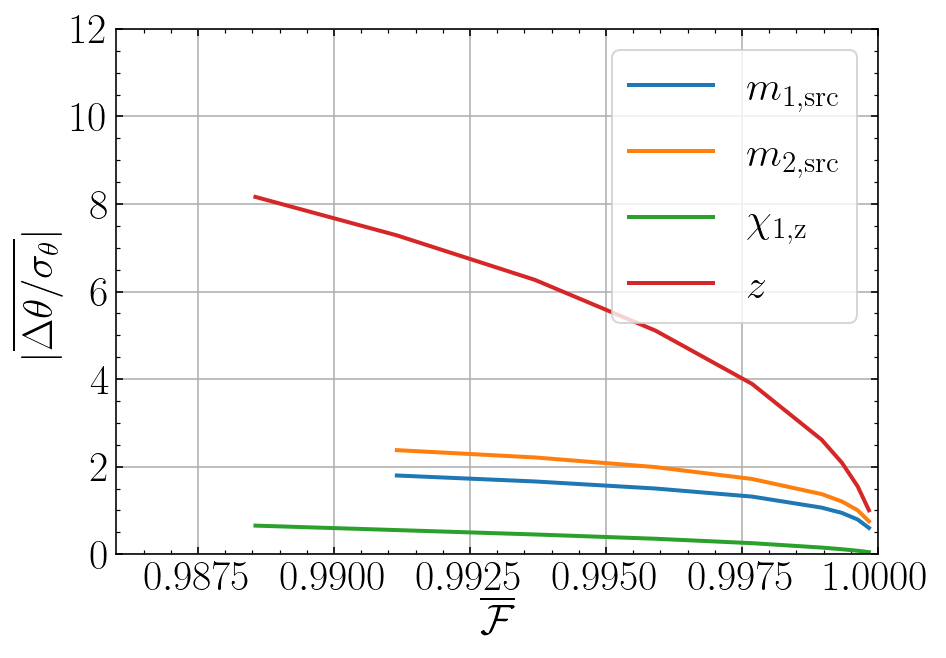

In [59]:
hybrs = np.unique(df["hybr"])[2:]

# vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'z']
# vars = ['m1', 'm1_src', 'z']
vars = ['m1_src','m2_src', 'chi1z', 'z']

# vars = ["Mc"]

snr_lim = 50
n_sigma = 2
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 5))


bias_avg_var_plot(df, ax, hybrs[:9], x_qty="faith", vars=vars, title='3G', labels=labels, snr_lim=snr_lim,
                lw=2, linestyle='-')


ax.set_xlabel("$\overline{\mathcal{F}}$")
ax.set_ylabel("$|\overline{\Delta \\theta/\sigma_{\\theta}}|$")

plt.legend(loc='upper right')

plt.grid(which='major')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)

ax.set_ylim(0, 12)
ax.set_xlim(0.986, 1.0)

plt.tight_layout()
# plt.savefig('1D_bias_plots/3g_pop_bias_sig_vs_faith.pdf', dpi=300)

plt.show()

## % of Biased events from Total Population

In [346]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.interpolate import make_interp_spline

def bias_perc_plot(df, ax, hybrs, axins=None, n_sigma=1.0, x_qty="hybr", xlabel='$\lambda$', title='', vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'], snr_factor = 1.0,
                    legend_loc='upper right', snr_lim = None, labels=None, **kwargs):

    snr_cut_str = " "
    if snr_lim is not None:
        df = df[df["snr"]>snr_lim]
        snr_cut_str = f"SNR>{snr_lim:.1f}"
    

    for var in vars:
        x_data = np.zeros_like(hybrs)
        bias_perc = np.zeros_like(hybrs)
        bias_num = np.zeros_like(hybrs)
        for i, hybr in enumerate(hybrs):
            df_hybr = df[df["hybr"]==hybr]
            x_data[i] = np.average(df_hybr[x_qty])

            data = snr_factor* df_hybr[f"{var}_bias"]/df_hybr[f"{var}_err"]
            bias_perc[i] = 100* np.sum(np.abs(data)>n_sigma) / len(data)
            bias_num[i] = np.sum(np.abs(data)>n_sigma)

        if labels is None:
            ax.plot(1-x_data, bias_perc, **kwargs)
        else:
            cs = make_interp_spline(x_data, bias_perc)
            x = np.linspace(x_data[0], x_data[-1], 10000)
            ax.plot(1-x, cs(x), label=labels[var], **kwargs)
            # ax.plot(1-x_data, bias_perc, label=labels[var], **kwargs)

            if axins is not None:
                axins.plot(1-x, cs(x), label=labels[var], **kwargs)
                # axins.plot(1-x_data, bias_perc, **kwargs)


            
       
            
        

    ax.set_xlabel(xlabel)
    # ax.set_ylabel(f"Biased Events (%)")
    # ax.set_title(f"{title} Bias Percentage ($\geq${n_sigma}$\sigma$)")

In [95]:
# hybrs = np.unique(df["hybr"])

# # vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL']
# # vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
# # vars = ['m1', 'm2', 'chi_eff', 'DL']
# vars = ['m1_det', 'q', 'chi1z', 'z']

# # vars = ["Mc"]




# snr_lim= 50
# n_sigma = 2
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 5))

# bias_perc_plot(df, ax, hybrs[:], n_sigma=n_sigma, vars=vars, title='3G', labels=labels, snr_lim=snr_lim,
#                 lw=2, linestyle='-')

# # ax.set_ylim(0, 60)
# ax.set_xlim(0.95, 1.0)
# # ax.set_xscale('log')

# ax.set_ylabel('$\geq 2\sigma$ Bias (\%)')
# ax.set_xlabel("$\lambda$")

# plt.legend(loc='upper right')

# plt.grid(which='major', alpha=0.5)
# plt.minorticks_on()
# plt.tick_params(which='both', direction='in', tick2On=True)



# plt.tight_layout()
# # plt.savefig('1D_bias_plots/3g_pop_percentage_vs_lambda.pdf', dpi=300)

# plt.show()

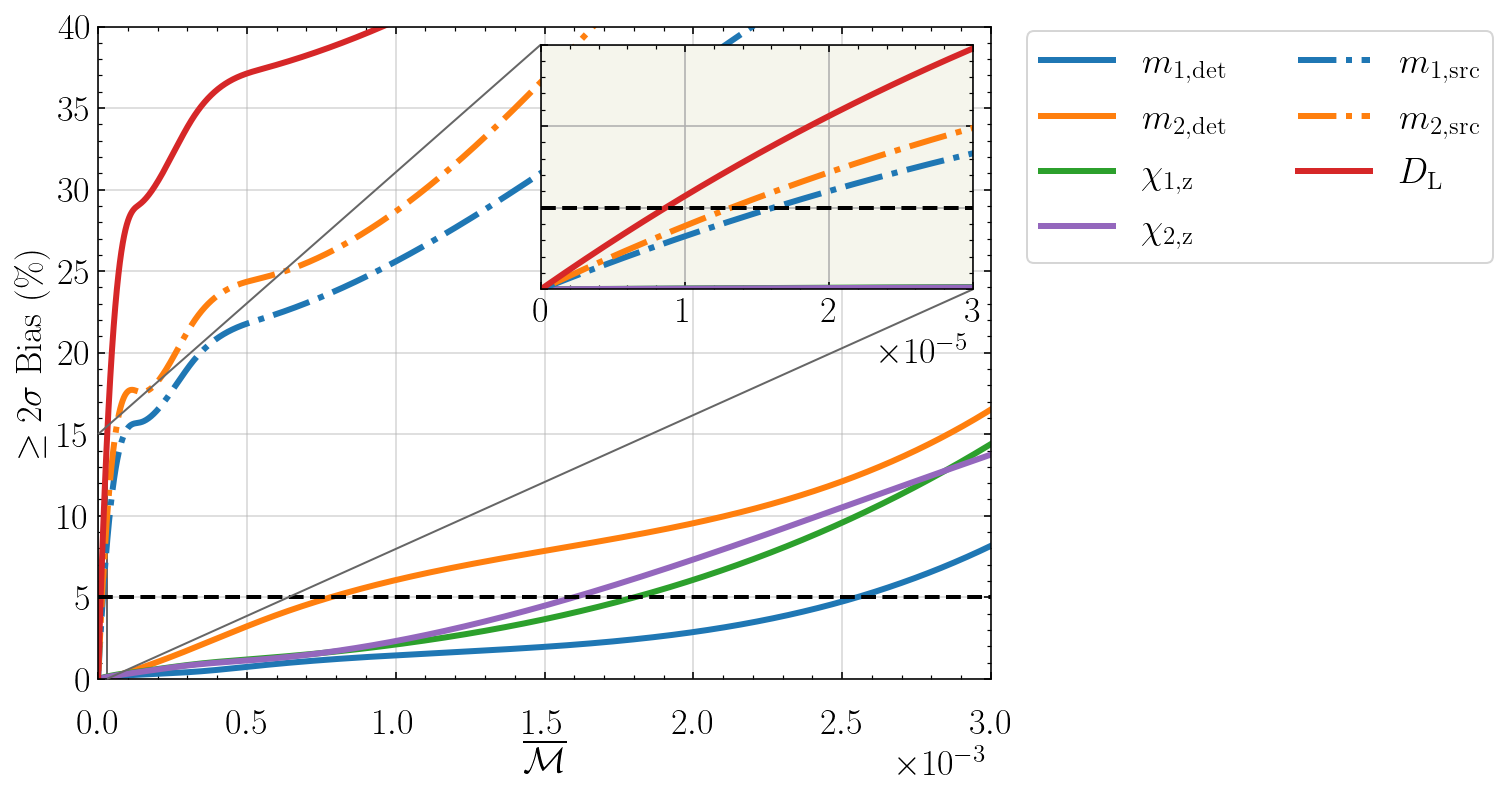

In [459]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import MaxNLocator

from cycler import cycler

# hybrs = np.unique(df["hybr"])[:]
hybrs = [ 0.0, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

# vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi_eff', 'DL']
# vars = ['m1_src', 'm2_src',  'q', 'm_tot', 'chi1z', 'chi2z', 'DL']
vars = ['m1_det', 'm2_det', 'chi1z', 'chi2z', 'm1_src','m2_src', 'DL']

custom_cycler = (cycler(color=['tab:blue', 'tab:orange',  'tab:green', 'tab:purple', 'tab:blue', 'tab:orange', 'tab:red']) 
                 + cycler(linestyle=['-', '-', '-', '-', '-.', '-.',  '-'])
                 )

snr_lim= 100
n_sigma = 2


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))

axins = inset_axes(ax, width=3, height=1.7, loc=1)

ax.set_prop_cycle(custom_cycler)
axins.set_prop_cycle(custom_cycler)

bias_perc_plot(df, ax, hybrs[:], axins=axins, n_sigma=n_sigma, x_qty="faith", xlabel="Avg Faithfulness", vars=vars, title='3G', labels=labels, snr_lim=snr_lim,
                lw=3)


ax.axhline(y=5, ls='--', lw=2, color='k')
axins.axhline(y=5, ls='--', lw=2, color='k')

ax.set_ylim(0, 4e1)
ax.set_xlim(0, 3e-3)

ax.set_ylabel(f'$\geq {n_sigma}\sigma$ Bias (\%)')
ax.set_xlabel("$\overline{\mathcal{M}}$")

ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left', ncol=2)

# ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
ax.tick_params(axis='x', pad=15)

ax.grid(which='major', alpha=0.5)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', tick2On=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)


axins.set_xlim(0, 3e-5) # Limit the region for zoom
axins.set_ylim(0, 15)
# axins.set_xscale('log')

axins.grid(which='major', alpha=1)
axins.minorticks_on()
axins.tick_params(which='both', direction='in', tick2On=True)
axins.set_facecolor("#f5f5ec")
axins.yaxis.set_tick_params(labelleft=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.4", ls='-')


plt.tight_layout

plt.savefig('1D_bias_plots/3g_pop_percentage_vs_faith.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Relative Bias Histograms

In [270]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 22
})

In [271]:
def bias_hist_plot(df, ax, hybr='0.9', title='', vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'], n_sigma=2.0, snr_factor = 1.0,
                    bins=30, legend_loc='upper right', snr_lim = None ,kde=False, labels=None, 
                    hyb_text = True, hyb_text_x=-18, hyb_text_y=2.7, 
                    faith_text = True, faith_text_x=-18, faith_text_y=1.0, **kwargs):
    mask = (df['hybr']==hybr)

    snr_cut_str = " "
    if snr_lim is not None:
        mask = mask & (df["snr"]>snr_lim)
        snr_cut_str = f"SNR>{snr_lim:.1f}"
    
    df = df[mask]

    for var in vars:
        data = snr_factor* df[f"{var}_bias"]/df[f"{var}_err"]
        bias_num = np.sum(np.abs(data)>n_sigma)
        bias_perc = 100* np.sum(np.abs(data)>n_sigma) / len(data)
        if labels is None:
            label=var + f" ({bias_perc:.1f}\% biased)"
        else:
            # label = labels[var] + "  ($N_{\\rm bias}$ = " + f"{bias_num})"
            label = labels[var] + f" ({bias_perc:.1f}\% biased)"
        if not kde:
            ax.hist(data, bins=bins, histtype='step', label=label, **kwargs)
        else:
            sns.kdeplot(data=data, ax=ax, bw_adjust=1, gridsize=1000, label=label)

    # ax.set_xlabel("$\Delta \\theta / \sigma_{\\theta}$")
    # ax.set_title(title)
    if hyb_text:
        ax.text(hyb_text_x, hyb_text_y, f'$\lambda$={hybr:.2f}', fontsize=20)
    
    if faith_text:
        faith = np.average(df["faith"])
        ax.text(faith_text_x, faith_text_y, "$\overline{\mathcal{M}} = $"+f" {1-faith:.1e}", fontsize=20)

    ax.legend(loc=legend_loc, fontsize=20)
    
    # ticks
    ax.tick_params(labelbottom=False, direction="in", which='major', length=5.0, width=1.0, top=True)



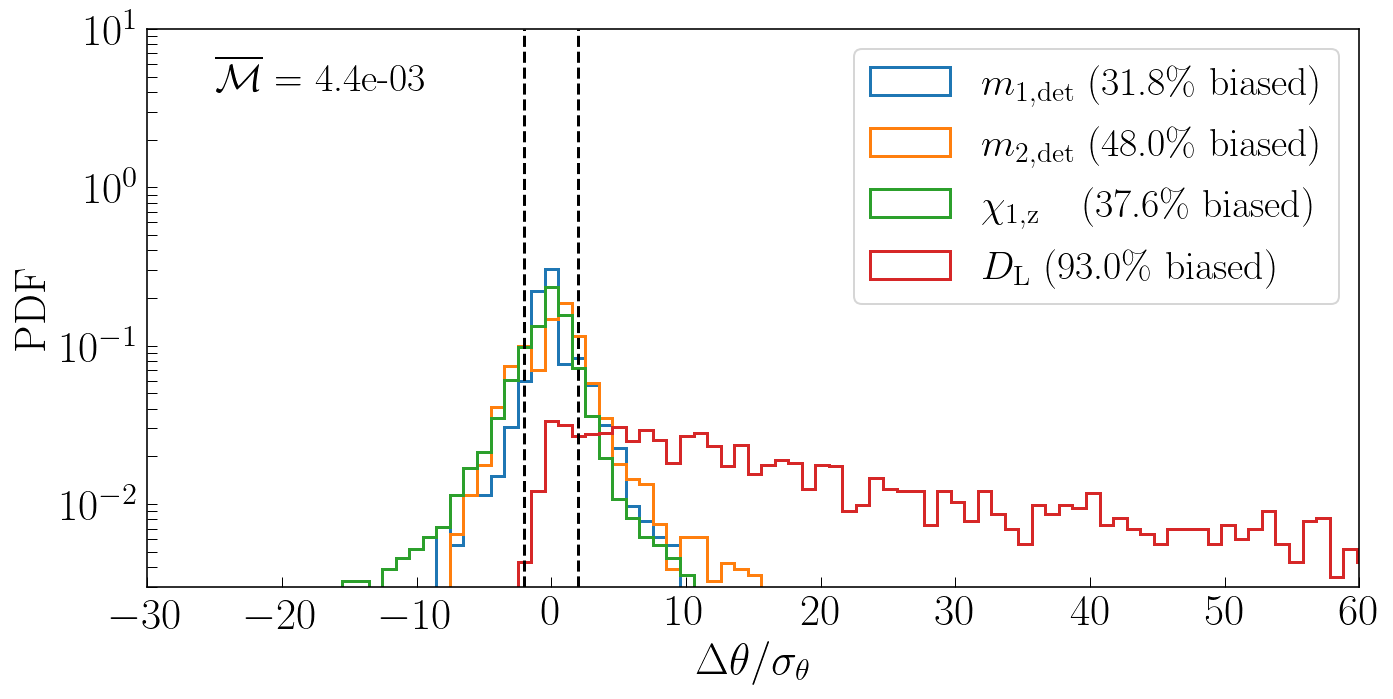

In [397]:
hybr=0.0
fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(10, 5))

# vars = ['m1_src', 'q']
# vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
vars = ['m1_det', 'm2_det', 'chi1z', 'DL']
# vars = ['m1_src', 'm2_src', 'chi1z', 'DL']



bins=np.linspace(-100, 100, 200)
# bins=30

snr_lim= 100

bias_hist_plot(df, ax, hybr=hybr, title='', n_sigma=2.0, vars=vars, bins=bins, labels=labels, snr_lim=snr_lim,
               hyb_text=False, faith_text=True, hyb_text_x=-25, faith_text_x=-25, faith_text_y=4,
            lw=1.5, density=True, kde=False)


# ax.text(x=-5, y=-1, s="IMRPhenomXAS", fontsize=18)


ax.axvline(x=2, color='k', ls='--')
ax.axvline(x=-2, color='k', ls='--')

ax.set_xlim(-30, 60)
ax.minorticks_off()
ax.set_ylim(0.003, 10)
ax.set_yscale('log')

ax.set_ylabel('PDF')

    
plt.xlabel("$\Delta \\theta / \sigma_{\\theta}$")
plt.tight_layout()

ax.tick_params(labelbottom=True, direction="in", length=5.0, width=.5, which="both", top=False)

# plt.savefig('1D_bias_plots/3g_pop_bias_histogram_hybr_0.pdf', dpi=300)

plt.show()

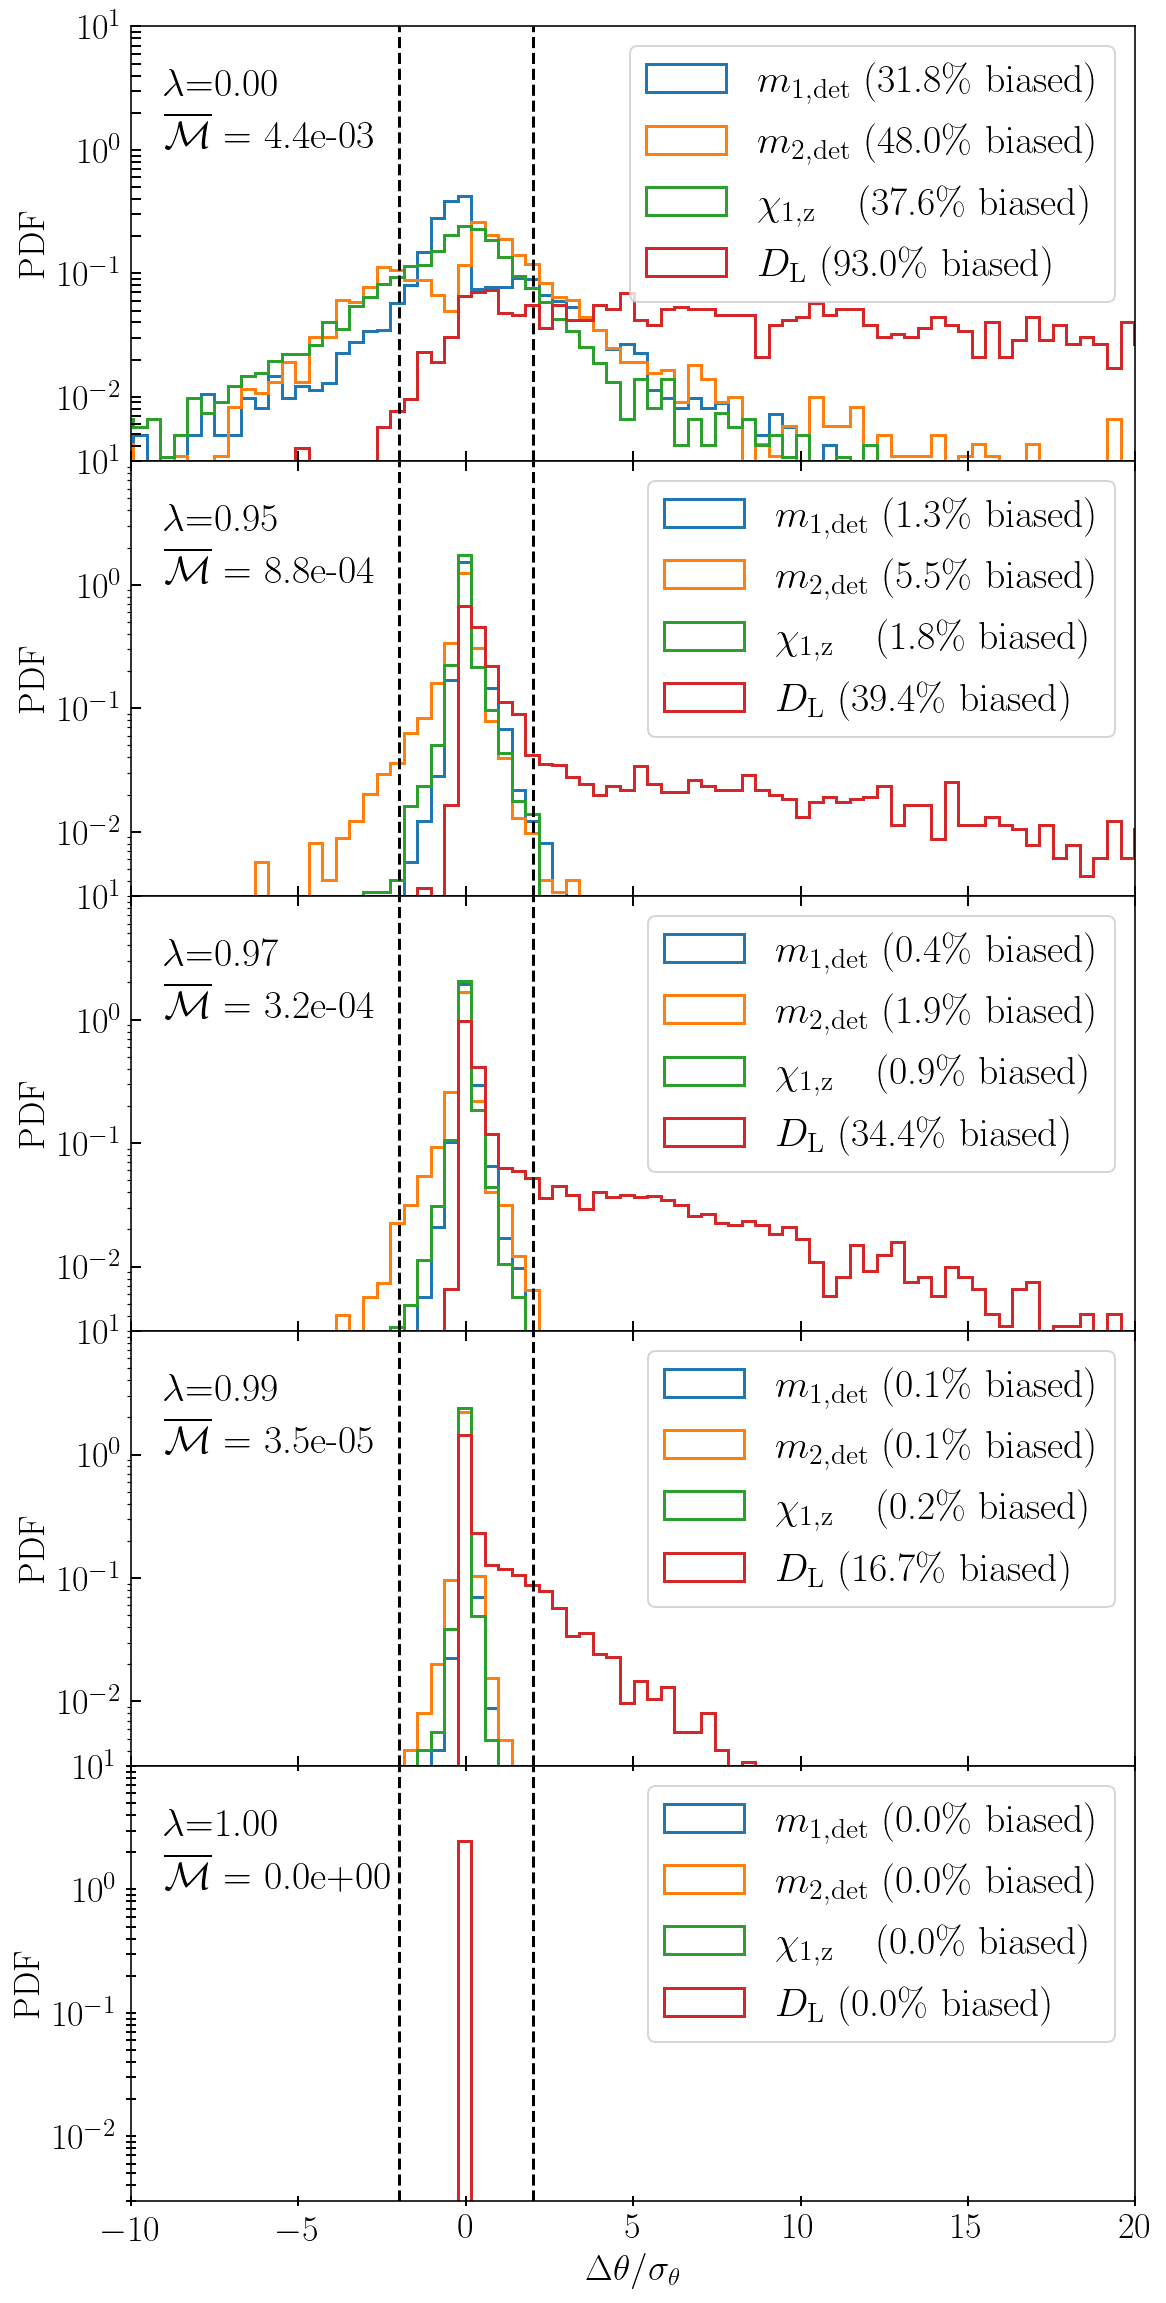

In [455]:
# hybrs = np.unique(df["hybr"])
hybrs = [0.0, 0.95, 0.97, 0.99, 1.0]

fig, axes = plt.subplots(ncols=1, nrows=len(hybrs), sharex=True, figsize=(9, 4*len(hybrs)))

# vars = ['m1_src', 'q']
# vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi_eff', 'DL']
vars = ['m1_det', 'm2_det', 'chi1z', 'DL']



bins=np.linspace(-16, 24, 100)
# bins=30

snr_lim= 100

for i, hybr in enumerate(hybrs):
    bias_hist_plot(df, axes[i], hybr=hybr, title=f'$\lambda$={hybr:.3f}', n_sigma=2.0, vars=vars, bins=bins, labels=labels, snr_lim=snr_lim,
                 hyb_text_x=-9, faith_text_x=-9,
                lw=1.5, density=True, kde=False)

axes[0].tick_params(labelbottom=False, direction="in", which='both', length=5.0, width=1.0, top=False)
axes[-1].tick_params(labelbottom=True, direction="inout", length=5.0, width=1.0, which="both", top=True)


for ax in axes:
    ax.axvline(x=2, color='k', ls='--')
    ax.axvline(x=-2, color='k', ls='--')
    ax.set_xlim(-10, 20)
    ax.set_ylim(0.0, 3.5)
    ax.minorticks_off()
    ax.set_ylim(0.003, 10)
    ax.set_yscale('log')
    ax.set_ylabel('PDF')
    
plt.xlabel("$\Delta \\theta / \sigma_{\\theta}$")

plt.subplots_adjust(hspace=.0)

# plt.tight_layout()

# plt.savefig('1D_bias_plots/3g_pop_bias_histograms.pdf', dpi=300)

plt.show()

### mini-investigation: why is m1 bias negative for $\lambda=0$ but positive for $\lambda=1$ ?

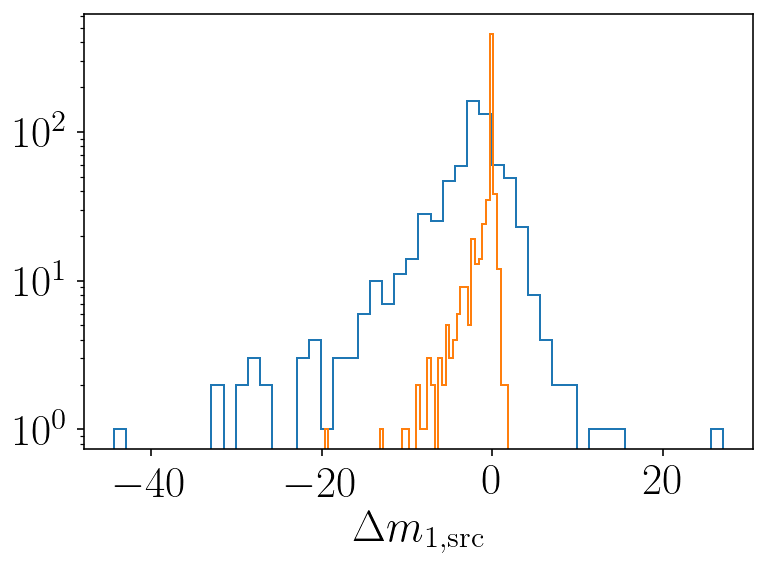

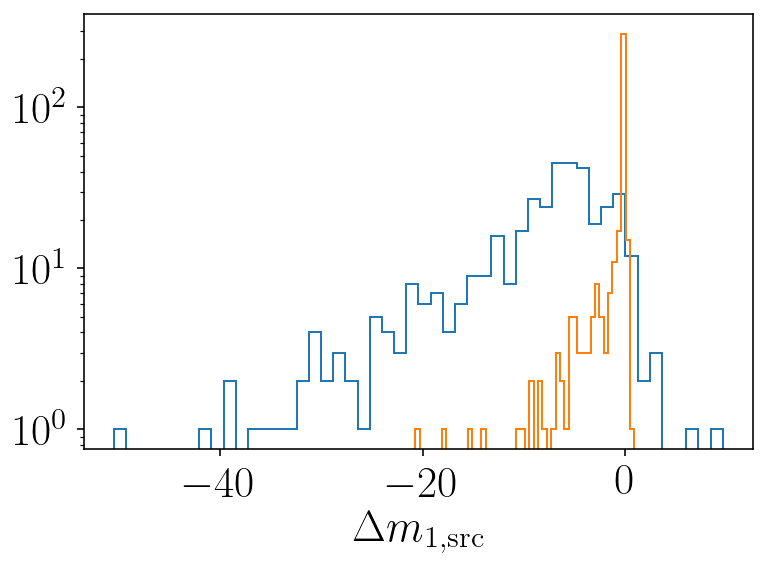

In [278]:
bins = 50

data = df[(df["hybr"]==0.0) & (df["snr"]>100) & (df["q"]>0.9)]
plt.hist(data["m1_src_bias"], bins=bins, histtype='step');

data = df[(df["hybr"]==0.99) & (df["snr"]>100) & (df["q"]>0.9)]
plt.hist(data["m1_src_bias"],bins=bins, histtype='step');

plt.xlabel("$\Delta m_{1, \\rm src}$")

plt.semilogy()
plt.show()


data = df[(df["hybr"]==0.0) & (df["snr"]>100) & (df["q"]<0.5)]
plt.hist(data["m1_src_bias"], bins=bins, histtype='step');

data = df[(df["hybr"]==0.99) & (df["snr"]>100) & (df["q"]<0.5)]
plt.hist(data["m1_src_bias"],bins=bins, histtype='step');

plt.xlabel("$\Delta m_{1, \\rm src}$")

plt.semilogy()
plt.show()


As we go from IMRPhenomD to IMRPhenomXAS, the differences in the extreme mass-ratio binaries are huge. Going from one to the other, I can check which part of the waveform disagree wildly (inspiral vs merger). That might give some hint as to what's going on. If the hybrid waveforms have some behavior that makes them mimic more high mass 

# Identify 3 interesting Binaries to study with Bayesian PE

In [124]:
labels = {
    'Mc': '$\mathcal{M}_c$',
    'eta': '$\eta$',
    'chi1z': '$\chi_{1,\\rm z}$',
    'chi2z': '$\chi_{2, \\rm z}$',
    'DL': '$D_{\\rm L}$',
    'z': '$z$',
    'm1_det': '$m_1$',
    'm2_det': '$m_2$',
    'm1_src': '$m_{1, \\rm src}$',
    'm2_src': '$m_{2, \\rm src}$',
    'chi_eff': '$\chi_{\\rm eff}$',
    'ra': 'ra',
    'dec': 'dec',
    'psi': 'psi',
    'iota': 'iota',
    'q': '$q$'
}

In [125]:
import scipy.stats as stats

def plot_bias(index, vars, labels, hybr=0.0, hybr_2=None):
    fig, axes = plt.subplots(ncols=1, nrows=len(vars), figsize=(8, 3*len(vars)))
    ax = list(axes)
    
    df_bias = df[(df["hybr"]==hybr) * df["index"]==index]
    if hybr_2 is not None:
        df_2_bias = df[(df["hybr"]==hybr_2) * df["index"]==index]

    for i, param in enumerate((vars)):
        mu = df_bias[param]
        sigma = df_bias[param+"_err"]
        bias = df_bias[param+"_bias"]

        x = np.linspace(mu-3*bias, mu+3*bias, 10000)
        if (param == 'chi1z' or param == 'chi2z'):
            x = np.linspace(-1, 1, 10000)
        if (param == 'q'):
            x = np.linspace(0, 1, 10000)
        if (param == 'eta'):
            x = np.linspace(0, 0.25, 10000)
        if (param == 'DL' or param == 'z' or param=='Mc' or param=='m1_det' or param=='m1_src' or param=='m2_det' or param=='m2_src'):
            x = np.linspace(np.maximum(0, mu-np.abs(3*bias)), mu+np.abs(3*bias), 10000)

        inj_est = stats.norm.pdf(x, mu, sigma)
        inj_est = inj_est/np.sum(inj_est)

        biased_est = stats.norm.pdf(x, mu+bias, sigma)
        biased_est = biased_est/ np.sum(biased_est)

        # print(bias/sigma)
        
        ax[i].plot(x, inj_est, label=f"Injected (IMRPhenomXAS)", color='k', lw=2)
        ax[i].plot(x, biased_est, label=f"Recovered (IMRPhenomD)",color='r', lw=2)

        if hybr_2 is not None:
            bias_2 = df_2_bias[param+"_bias"]
            biased_est_2 = stats.norm.pdf(x, mu+bias_2, sigma)
            biased_est_2 = biased_est_2/ np.sum(biased_est_2)
            ax[i].plot(x, biased_est_2, label=f"Hybrid ($\lambda=${hybr_2:.2f})",color='orange', lw=2)

        ax[i].set_xlabel(labels[param])
        ax[i].set_ylabel(f"p({labels[param]})")
        
        if i==0:
            ax[i].legend(bbox_to_anchor=(1.1, 1), fontsize=14)


    # plt.suptitle( " Systematic Bias \n IMRPhenomXAS and IMRPhenomD", y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

In [126]:
def plot_bias_hybrs(index, vars, labels, hybrs=[0.0, 0.8, 1.0]):
    fig, axes = plt.subplots(ncols=len(hybrs), nrows=len(vars), figsize=(15, 3*len(vars)))
    ax = list(axes)
    
    for j, hybr in enumerate(hybrs):
        df_bias = df[(df["hybr"]==hybr) * df["index"]==index]

        for i, param in enumerate((vars)):
            mu = df_bias[param]
            sigma = df_bias[param+"_err"]
            bias = df_bias[param+"_bias"]

            x = np.linspace(mu-3*sigma, mu+3*sigma, 10000)
            if (param == 'chi1z' or param == 'chi2z'):
                x = np.linspace(-1, 1, 10000)
            if (param == 'q'):
                x = np.linspace(0, 1, 10000)
            if (param == 'eta'):
                x = np.linspace(0, 0.25, 10000)
            if (param == 'DL' or param == 'z' or param=='Mc' or param=='m1_det' or param=='m1_src' or param=='m2_det' or param=='m2_src'):
                x = np.linspace(np.maximum(0, mu-np.abs(3*sigma)), mu+np.abs(2*sigma)+ np.abs(2*bias), 10000)

            inj_est = stats.norm.pdf(x, mu, sigma)
            inj_est = inj_est/np.sum(inj_est)

            biased_est = stats.norm.pdf(x, mu+bias, sigma)
            biased_est = biased_est/ np.sum(biased_est)

            ax[i][j].plot(x, inj_est, label=f"Injected (IMRPhenomXAS)", color='k', lw=2)
            ax[i][j].plot(x, biased_est, label=f"Recovered (IMRPhenomD)", color='r', lw=2)
            ax[i][j].set_xlabel(labels[param])
            ax[i][j].set_ylabel(f"p({labels[param]})")
            
            if i==0:
                ax[i][j].set_title(f"$\lambda$={hybr}")
                if j==len(hybrs)-1:
                    ax[i][j].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)


    plt.suptitle( " Systematic Bias \n IMRPhenomXAS and IMRPhenomD", y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

### Golden Binary ($m_1 \sim 37 M_\odot$, $q \sim 0.8$, $\chi_{1,z} \sim 0$, $\chi_{2,z} \sim 0.02$, z $\sim 0.34$, SNR $\sim 725$): 54837

It's like GW150914, but DL = 1900 Mpc instead of 400 Mpc. So all biases would be roughly 5x for GW150914

In [57]:
mask = (df["hybr"]==0.0)  * (df["snr"]>300) * (np.abs(df["chi1z"])<0.1) * (np.abs(df["chi2z"])<0.1) * (df["z"]>0.1) * (df["Mc_bias"]/df["Mc_err"]>100)
df[mask]

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


,index,Mc,eta,chi1x,chi2x,chi1y,chi2y,chi1z,chi2z,DL,...,m2_det_bias,q,q_err,q_bias,m_tot,m_tot_bias,m_tot_err,chi_eff,chi_eff_bias,chi_eff_err
17704,77844,21.718510,0.247922,0.0,0.0,0.0,0.0,-0.011828,0.091565,1300.845634,...,2.297809,0.832877,0.106905,0.167123,40.118645,-9.396048,2.357952,0.035155,-0.035155,0.222425
7505,47519,41.330138,0.249973,0.0,0.0,0.0,0.0,0.050039,0.024324,3972.874912,...,1.264044,0.979289,0.092828,0.020711,57.707184,-19.413327,3.818635,0.037316,-0.037316,1.936620
14802,54837,39.097781,0.247392,0.0,0.0,0.0,0.0,-0.006386,0.027479,1884.305356,...,5.132224,0.814664,0.072424,0.185336,67.201684,-4.962585,2.851920,0.008817,-0.008817,0.122587
9667,89873,28.755875,0.249997,0.0,0.0,0.0,0.0,0.064398,0.038486,664.052457,...,0.493387,0.993050,0.089203,0.006950,58.138436,-8.795229,2.384820,0.051487,-0.051487,1.489142
17359,97605,42.650475,0.249021,0.0,0.0,0.0,0.0,0.015724,-0.097603,988.167739,...,3.953417,0.882205,0.075134,0.117795,82.139877,-15.500838,2.987316,-0.037393,0.037393,0.114555
17437,97683,37.323075,0.249672,0.0,0.0,0.0,0.0,0.001898,-0.034317,4643.134233,...,2.332174,0.930090,0.087943,0.069910,49.499088,-17.929471,3.347272,-0.015553,0.015553,0.735926


                     14802
index         54837.000000
Mc               39.097781
eta               0.247392
chi1x             0.000000
chi2x             0.000000
chi1y             0.000000
chi2y             0.000000
chi1z            -0.006386
chi2z             0.027479
DL             1884.305356
tc                0.000000
phic              0.000000
iota              0.389333
ra                0.167403
dec              -0.352156
psi               4.411578
gmst0             0.000000
hybr              0.000000
Mc_err            0.002724
eta_err           0.001624
chi1z_err         0.157146
chi2z_err         0.193266
DL_err          102.768080
tc_err            0.001042
phic_err          0.727043
iota_err          0.135296
ra_err            0.000477
dec_err           0.000404
psi_err           0.363362
Mc_bias           0.696257
eta_bias          0.294438
chi1z_bias       -0.993614
chi2z_bias        0.972521
DL_bias         819.813637
tc_bias           0.254661
phic_bias        12.627920
i

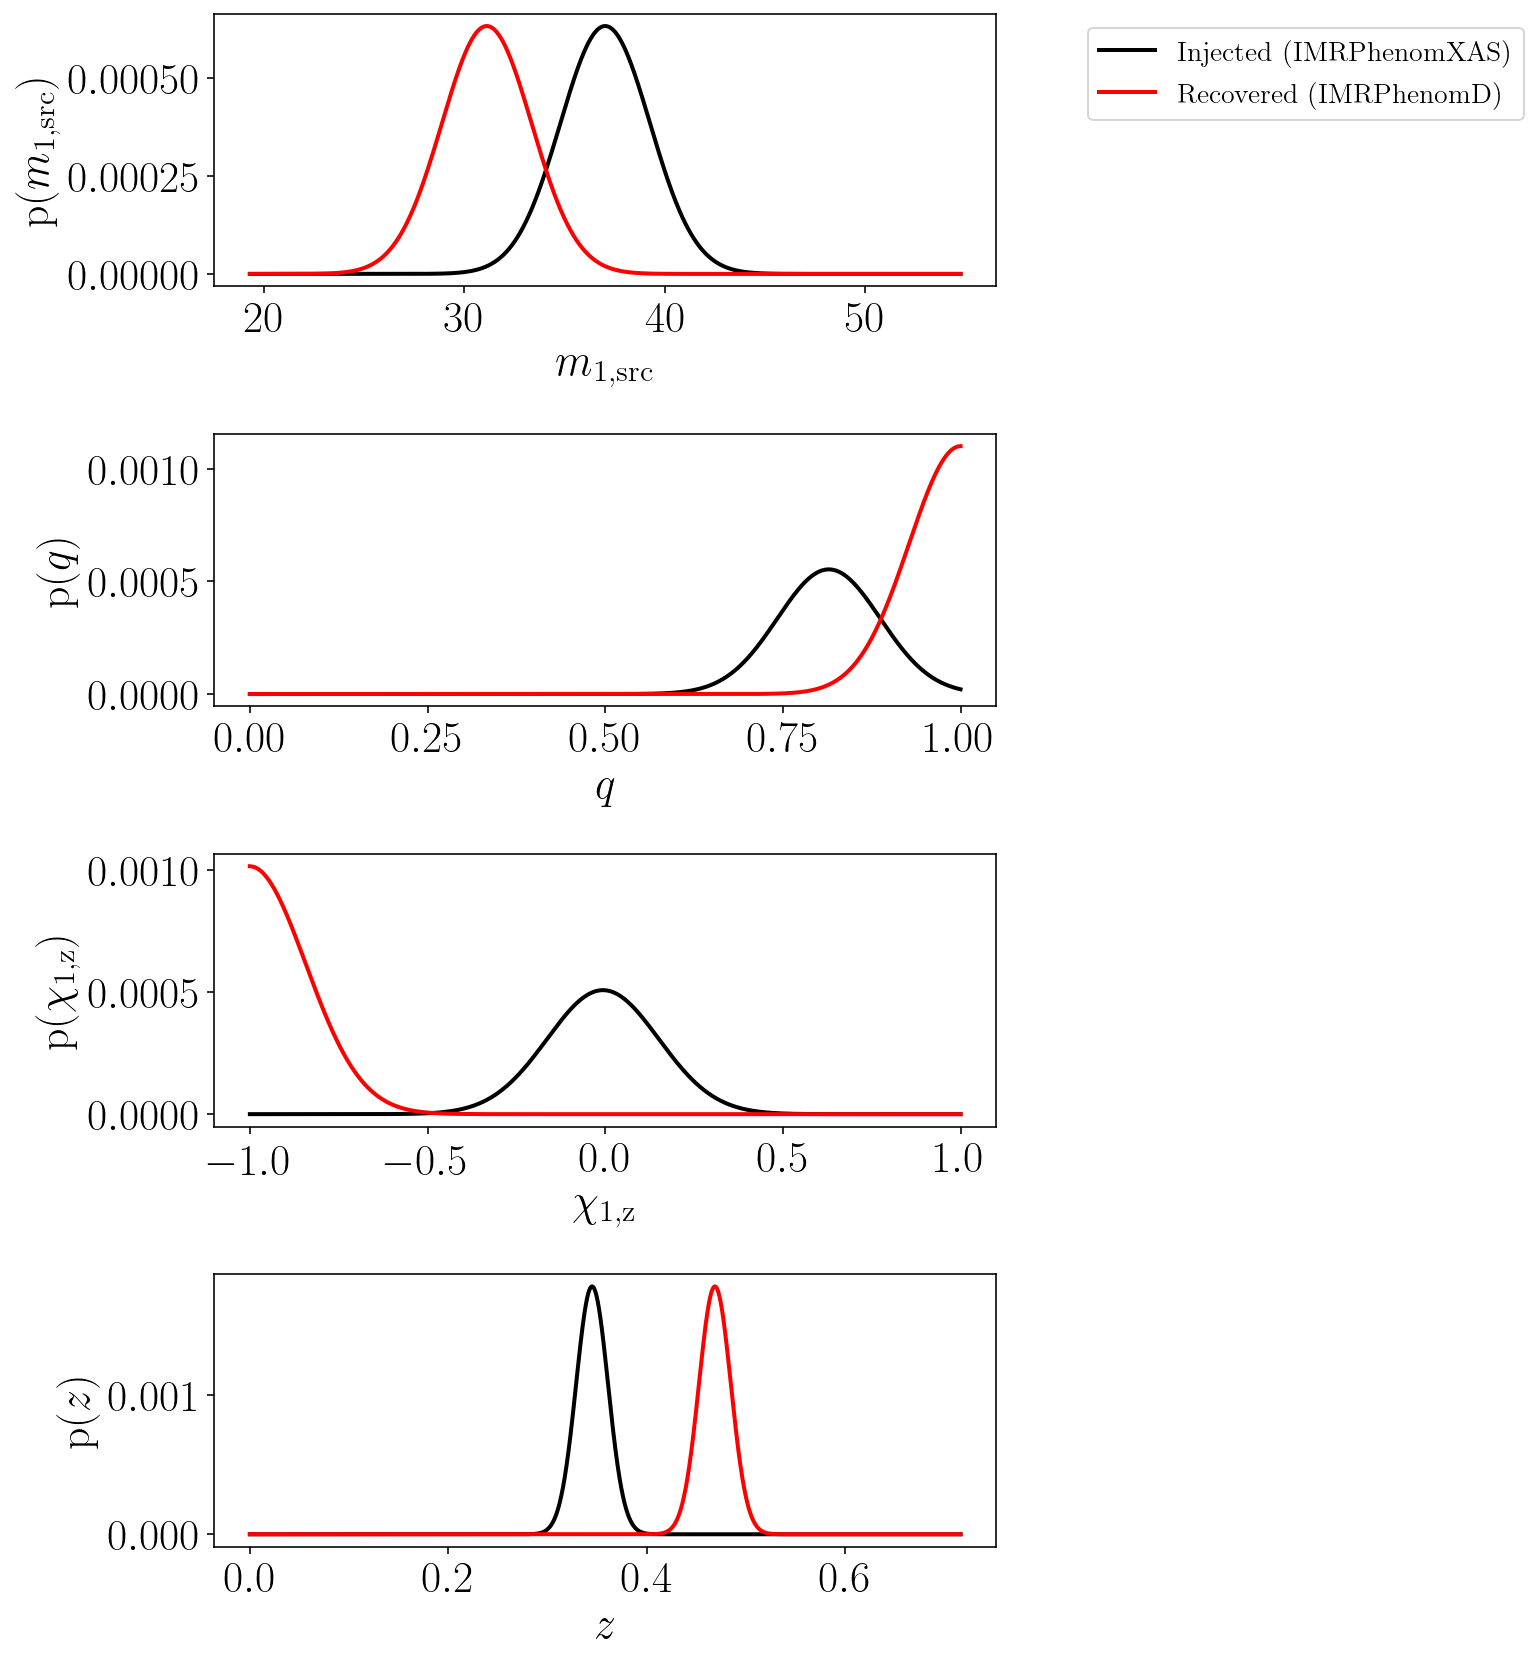

In [58]:
index = 54837
print(df[(df["index"]==index) & (df["hybr"]==0.0)].transpose().to_string())
# print("SNR: ", df[(df["index"]==index) & (df["hybr"]==0.0)]["snr"].values)


vars=['m1_src', 'q', 'chi1z', 'z']
# vars=['m1_src', 'm2_src', 'chi1z', 'z', 'DL', 'ra', 'dec', 'iota']
plot_bias(index=index, vars=vars ,labels=labels, hybr=0.0)#, hybr_2 = 0.96)

### Bias is above mass gap: 16687

In [59]:
mask = (df["hybr"]==0.0) * (np.abs(df["m1_src"]+df["m1_src_bias"])>70) * (np.abs(df["m1_src"])<50) * (np.abs(df["m1_src_bias"]/df["m1_src_err"])>2) * (df["z"] + df["z_bias"] > 0.2)
df[mask]

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


,index,Mc,eta,chi1x,chi2x,chi1y,chi2y,chi1z,chi2z,DL,...,m2_det_bias,q,q_err,q_bias,m_tot,m_tot_bias,m_tot_err,chi_eff,chi_eff_bias,chi_eff_err
12884,72998,424.044527,0.246630,0.0,0.0,0.0,0.0,-0.072202,-0.000730,157852.685554,...,2007.648815,0.791936,0.022993,0.208064,64.433620,200.263458,14.691793,-0.040616,0.040616,2.008943
8987,49005,206.919194,0.249047,0.0,0.0,0.0,0.0,0.146045,-0.068385,37406.716318,...,57.319972,0.883711,0.052680,0.116289,93.999340,84.662169,14.579057,0.045449,-0.045449,2.481768
10864,50887,516.564316,0.246475,0.0,0.0,0.0,0.0,-0.025474,0.058153,192607.803868,...,2889.306422,0.787708,0.020337,0.212292,66.384441,390.725082,14.949107,0.011374,-0.011374,1.511886
2559,82725,257.315339,0.249460,0.0,0.0,0.0,0.0,-0.416909,0.045337,63963.128361,...,526.795479,0.911205,0.029213,0.088795,79.611308,96.858202,9.255089,-0.196524,0.196524,3.113044


                      8987
index         49005.000000
Mc              206.919194
eta               0.249047
chi1x             0.000000
chi2x             0.000000
chi1y             0.000000
chi2y             0.000000
chi1z             0.146045
chi2z            -0.068385
DL            37406.716318
tc                0.000000
phic              0.000000
iota              0.527311
ra                1.460384
dec              -0.082691
psi               1.948006
gmst0             0.000000
hybr              0.000000
Mc_err            5.481293
eta_err           0.017458
chi1z_err         3.249900
chi2z_err         3.802591
DL_err         9208.015000
tc_err            0.088464
phic_err          3.365765
iota_err          0.447500
ra_err            0.010533
dec_err           0.009507
psi_err           0.786696
Mc_bias          37.571273
eta_bias          0.658807
chi1z_bias       -1.146045
chi2z_bias        1.068385
DL_bias      -20075.085102
tc_bias           3.417308
phic_bias       100.356003
i

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


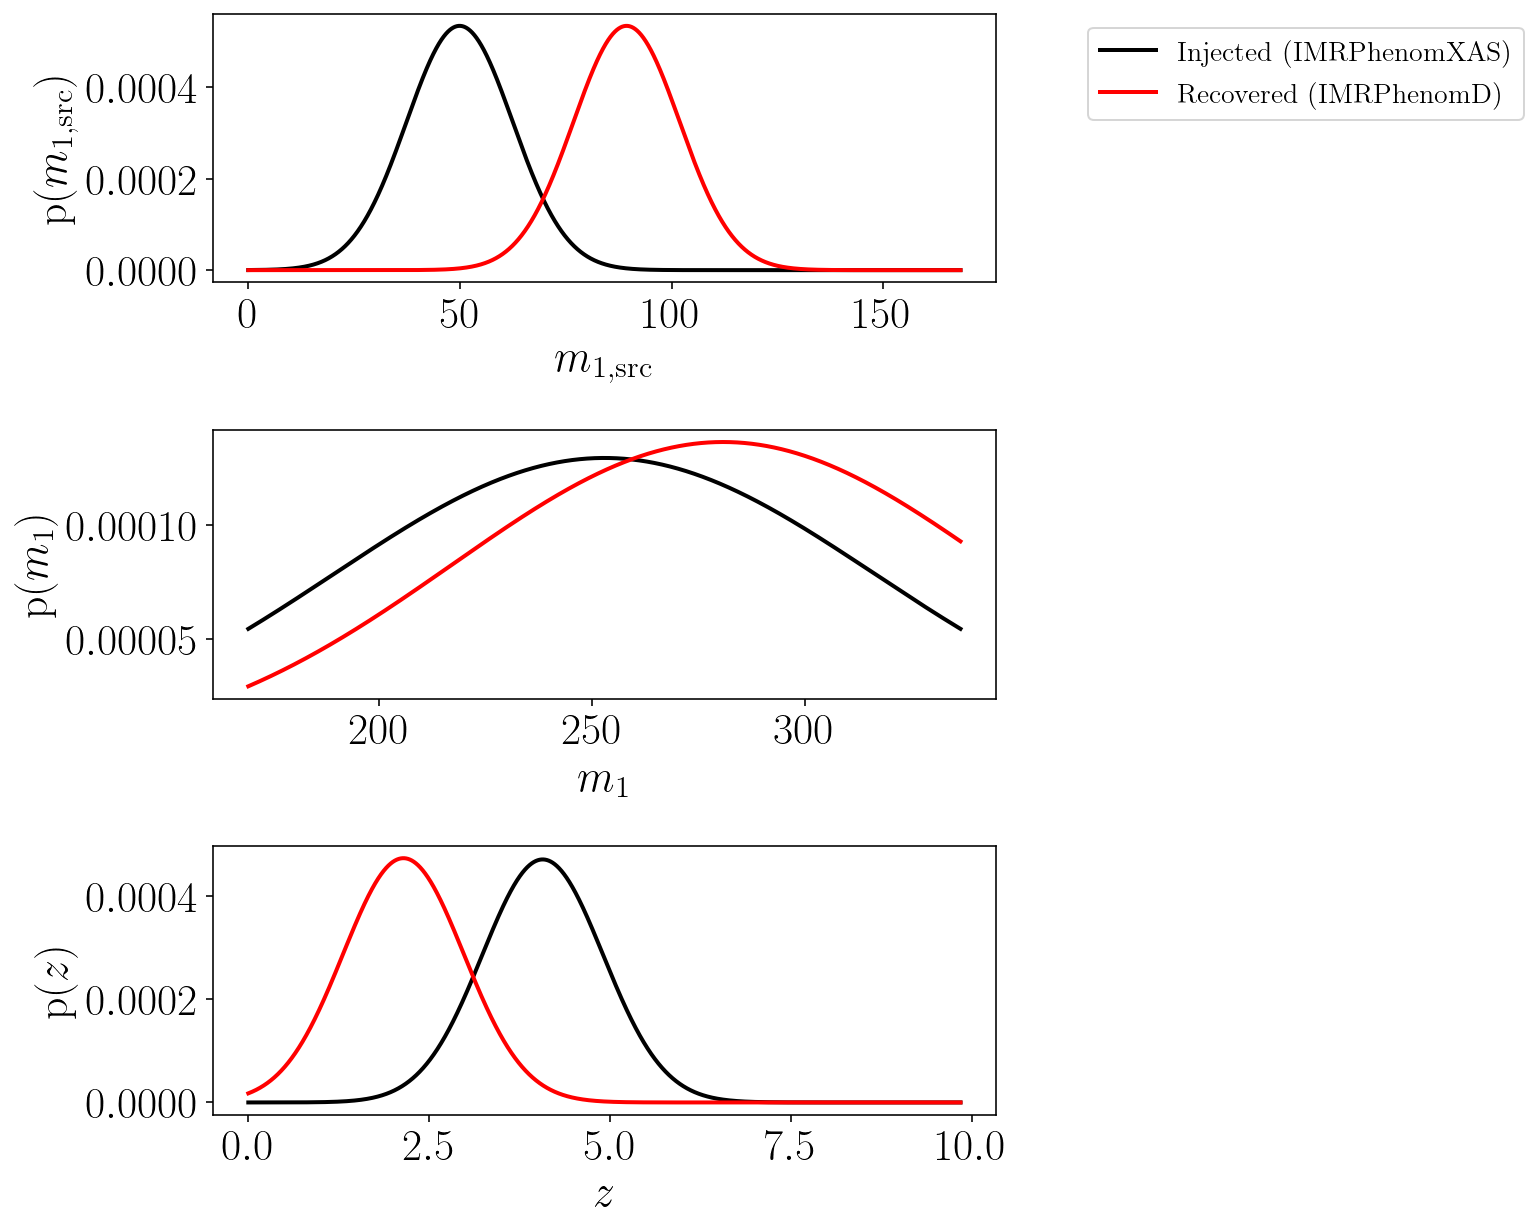

In [64]:
# index = 16687
index = 49005	

print(df[(df["index"]==index) & (df["hybr"]==0.0)].transpose().to_string())
# print("SNR: ", df[(df["index"]==index) * (df["hybr"]==0.0)]["snr"].values)
df_index = df[(df["index"]==index)* (df["hybr"]==0.0)]
m1 = ((df_index["m1_src"]))
bias = ((df_index["m1_src_bias"]))
err = ((df_index["m1_src_err"]))
print(m1)
print(m1+bias)
print(bias/err)

vars=['m1_src', 'm1_det', 'z']
# # vars=['m1_src', 'm2_src', 'chi1z', 'z', 'DL', 'ra', 'dec', 'iota']
plot_bias(index=index, vars=vars ,labels=labels, hybr=0.0)


                      8987
index         49005.000000
Mc              206.919194
eta               0.249047
chi1x             0.000000
chi2x             0.000000
chi1y             0.000000
chi2y             0.000000
chi1z             0.146045
chi2z            -0.068385
DL            37406.716318
tc                0.000000
phic              0.000000
iota              0.527311
ra                1.460384
dec              -0.082691
psi               1.948006
gmst0             0.000000
hybr              0.000000
Mc_err            5.481293
eta_err           0.017458
chi1z_err         3.249900
chi2z_err         3.802591
DL_err         9208.015000
tc_err            0.088464
phic_err          3.365765
iota_err          0.447500
ra_err            0.010533
dec_err           0.009507
psi_err           0.786696
Mc_bias          37.571273
eta_bias          0.658807
chi1z_bias       -1.146045
chi2z_bias        1.068385
DL_bias      -20075.085102
tc_bias           3.417308
phic_bias       100.356003
i

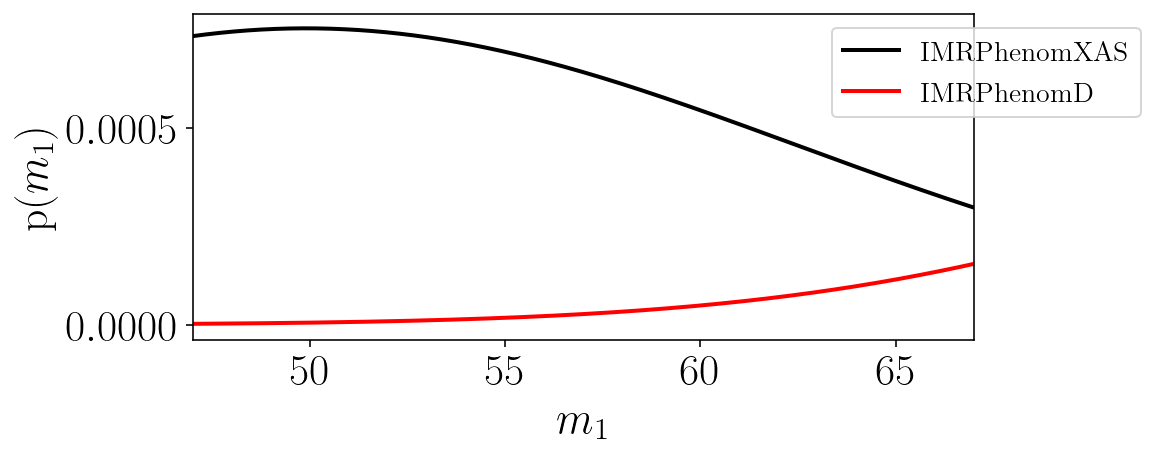

In [65]:
# index = 16687
index = 49005
print(df[(df["index"]==index) & (df["hybr"]==0.0)].transpose().to_string())

df_index = df[(df["index"]==index) & (df["hybr"]==0.0)]
mu = ((df_index["m1_src"]))
bias = ((df_index["m1_src_bias"]))
sigma = ((df_index["m1_src_err"]))

print(mu)
print(mu+bias)

fig, ax = plt.subplots(figsize=(7, 3))

x = np.linspace(mu-3*bias, mu+3*bias, 10000)
inj_est = stats.norm.pdf(x, mu, sigma)
inj_est = inj_est/np.sum(inj_est)

biased_est = stats.norm.pdf(x, mu+bias, sigma)
biased_est = biased_est/ np.sum(biased_est)

inj_est[x<0] = 0
biased_est[x<0] = 0

plt.plot(x, inj_est, label=f"IMRPhenomXAS", color='k', lw=2)
plt.plot(x, biased_est, label=f"IMRPhenomD",color='r', lw=2)

plt.xlim(47, 67)

plt.xlabel("$m_1$")
plt.ylabel("p$(m_1)$")

plt.legend(bbox_to_anchor=(0.8, 1), fontsize=14)

plt.show()

### Large, misaligned Spins ($m_1 \sim 6.5 M_\odot$, $q \sim 0.75$, $\chi_{1,z} \sim -0.6$, $\chi_{2,z} \sim 0.2$, z $\sim 0.2$ , SNR $\sim 170$): 88308

In [66]:
mask = (df["hybr"]==0.0) * ((df["chi1z"]/df["chi2z"]) < 0) * (np.abs(df["chi1z"]) > 0.5) * (df["snr"] > 100)
df[mask]

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


,index,Mc,eta,chi1x,chi2x,chi1y,chi2y,chi1z,chi2z,DL,...,m2_det_bias,q,q_err,q_bias,m_tot,m_tot_bias,m_tot_err,chi_eff,chi_eff_bias,chi_eff_err
10262,10265,3.861517,0.241520,0.0,0.0,0.0,0.0,-0.530622,0.012536,130.905634,...,0.069996,0.688944,0.037496,0.027347,8.802551,-0.386606,0.179197,-0.309061,0.055582,0.077992
6566,26573,8.686779,0.206617,0.0,0.0,0.0,0.0,-0.552783,0.025244,982.429409,...,3.439687,0.411858,0.026186,0.588142,18.728465,-6.299559,0.575732,-0.384165,0.384165,0.078579
1647,81809,6.796047,0.249965,0.0,0.0,0.0,0.0,0.540684,-0.091326,3069.890885,...,-1.121523,0.976532,0.053403,-0.267274,10.263338,-3.032368,0.332474,0.228431,-0.398530,3.090506
8111,88308,5.802907,0.245082,0.0,0.0,0.0,0.0,-0.630675,0.241278,1021.606335,...,0.421567,0.753999,0.186966,0.116293,11.227443,-2.049635,1.388210,-0.255845,0.090180,0.876406
18084,98334,6.604596,0.249999,0.0,0.0,0.0,0.0,0.559473,-0.004161,454.593236,...,-0.460370,0.996116,0.011617,-0.117885,13.846817,-1.629082,0.063748,0.278204,-0.213372,0.671893


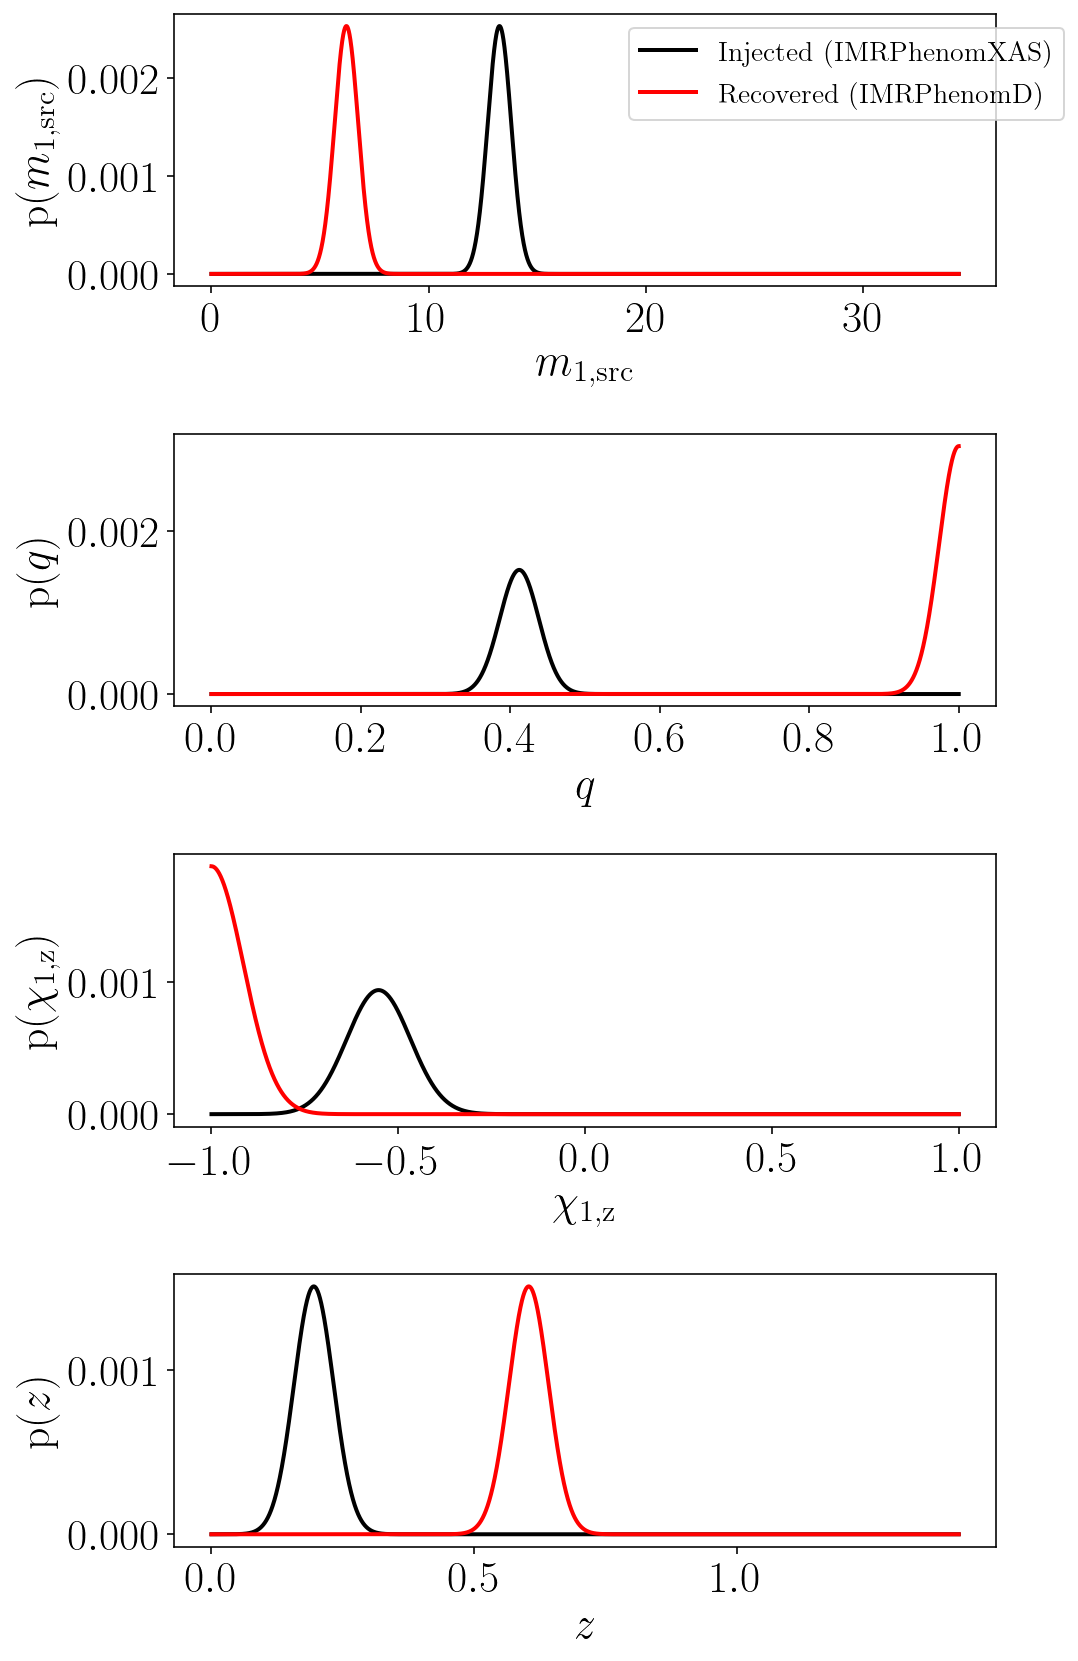

In [75]:
index = 26573
# print(df[(df["index"]==index) & (df["hybr"]==0.0)].transpose().to_string())
# print("SNR: ", df[(df["index"]==index) * (df["hybr"]==0.0)]["snr"].values)

vars=['m1_src', 'q', 'chi1z', 'z']
# vars=['m1_src', 'm2_src', 'chi1z', 'z', 'DL', 'ra', 'dec', 'iota']
plot_bias(index=index, vars=vars ,labels=labels, hybr=0.0)

In [76]:
mask = (df["hybr"]==0.0) * (np.abs(df["m1_src"])>40) * (np.abs(df["m2_src"])>40) * (df["z"] < 1.0)
df[mask]

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


,index,Mc,eta,chi1x,chi2x,chi1y,chi2y,chi1z,chi2z,DL,...,m2_det_bias,q,q_err,q_bias,m_tot,m_tot_bias,m_tot_err,chi_eff,chi_eff_bias,chi_eff_err
4528,4530,77.866412,0.246395,0.0,0.0,0.0,0.0,0.066716,0.088726,6194.468899,...,8.517852,0.785591,0.063874,0.214409,93.596749,-39.477997,5.343472,0.076399,-0.076399,0.233878
9721,69819,68.503066,0.247566,0.0,0.0,0.0,0.0,-0.004625,0.000305,4551.510201,...,8.079194,0.820384,0.076697,0.179616,91.943741,-32.400682,5.461477,-0.002403,0.002403,0.255553
12706,72819,76.385828,0.249495,0.0,0.0,0.0,0.0,0.077219,-0.199096,3802.796745,...,5.212382,0.914011,0.107679,0.085989,108.280297,-35.900908,8.848142,-0.054732,0.054732,0.766428
19023,79170,47.527595,0.248222,0.0,0.0,0.0,0.0,0.229195,0.152711,1108.390612,...,4.773582,0.844463,0.071314,0.155537,90.113541,-18.726183,3.298046,0.194178,-0.194178,0.075008


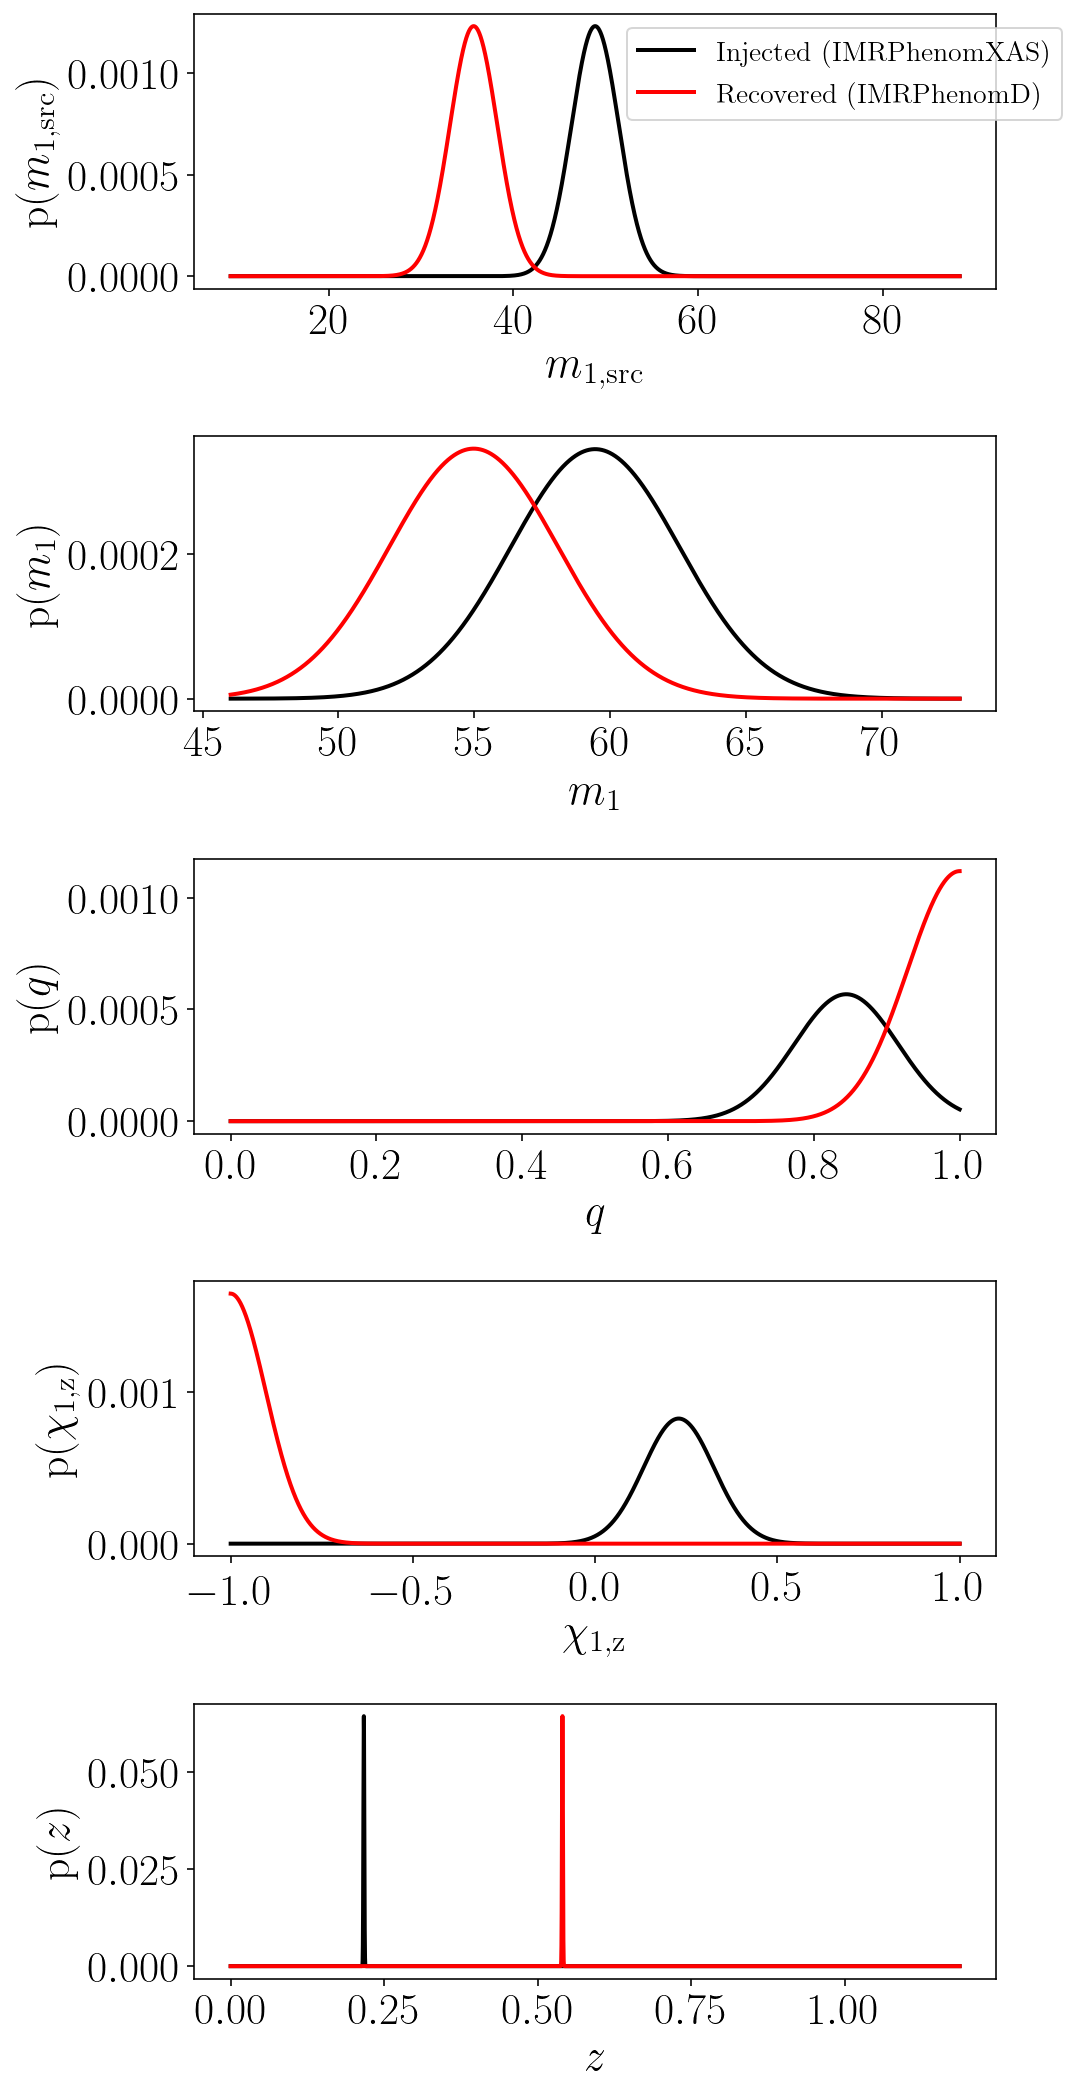

In [77]:
index = 79170
# print(df[(df["index"]==index) * (df["hybr"]==0.0)].transpose().to_string())
# print("SNR: ", df[(df["index"]==index) * (df["hybr"]==0.0)]["snr"].values)

vars=['m1_src', 'm1_det', 'q', 'chi1z', 'z']
# vars=['m1_src', 'm2_src', 'chi1z', 'z', 'DL', 'ra', 'dec', 'iota']
plot_bias(index=index, vars=vars ,labels=labels, hybr=0.0)

# q-chieff correlation test

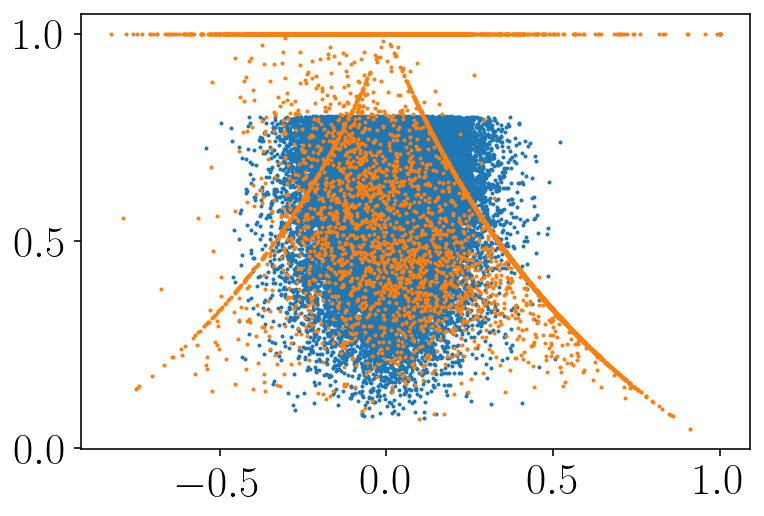

In [78]:
data = df[(df["hybr"]==0.0) & (df["snr"]>10) & (df["q"]<0.8)]
plt.scatter(data["chi_eff"], data["q"], s=1)

plt.scatter(data["chi_eff"]+data["chi_eff_bias"], data["q"]+data["q_bias"], s=1)
plt.show()

(0.0, 400000.0)

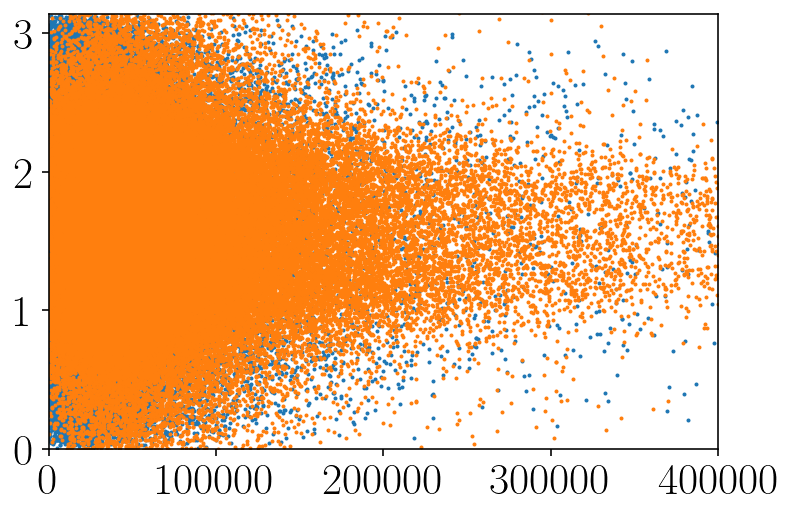

In [79]:
data = df[df["hybr"]==0.0]
plt.scatter(data["DL"], data["iota"], s=1)

plt.scatter(data["DL"]+data["DL_bias"], data["iota"]+data["iota_bias"], s=1)

plt.ylim(0, np.pi)
plt.xlim(0, 400000)